## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону _(The Radiant)_ , другая — за тёмную _(The Dire)_. Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](https://dota2.gamepedia.com/Game_modes), мы будем рассматривать режим [Captain's Mode](https://dota2.gamepedia.com/Game_modes#Captains_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

<img src="http://imgur.com/XFr4HYE.jpg" style="width: 800px;"/>

#### Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

<img src="http://imgur.com/5b0SlQb.jpg" style="width: 800px;"/>

#### Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

<img src="http://imgur.com/Du79Kzf.jpg" style="width: 800px;"/>


# Постановка задачи: предсказание победы по данным о первых 5 минутах игры

__По первым 5 минутам игры предсказать, какая из команд победит: Radiant или Dire?__

In [40]:
# Подключение модулей для работы с данными
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Загрузка данных

In [41]:
train = pd.read_csv('data/features.csv', index_col='match_id')
test = pd.read_csv('data/features_test.csv', index_col='match_id')

In [42]:
# Вывод первых 5 строк train DS
train.head(5) 

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63


# Обработка данных

## Удаление признаков

Снизу представлены характеристики, которые отображают итоги матча:


- __Итоги матча:__
    - `duration`: длительность в секундах
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - __Состояние башен и барраков к концу матча:__
        - `tower_status_radiant`: состояние башен у команды Radiant к концу игры
        - `tower_status_dire`: состояние башен у команды Dire к концу игры
        - `barracks_status_radiant`: состояние бараков у команды Radiant к концу игры
        - `barracks_status_dire`: состояние бараков у команды Dire к концу игры
        
### Описание полей состояния башен и бараков

Состояние башен к концу игры задается целым числом, закодировано в битах:

```
┌─┬─┬─┬─┬─────────────────────── Not used.
│ │ │ │ │ ┌───────────────────── Ancient Bottom
│ │ │ │ │ │ ┌─────────────────── Ancient Top
│ │ │ │ │ │ │ ┌───────────────── Bottom Tier 3
│ │ │ │ │ │ │ │ ┌─────────────── Bottom Tier 2
│ │ │ │ │ │ │ │ │ ┌───────────── Bottom Tier 1
│ │ │ │ │ │ │ │ │ │ ┌─────────── Middle Tier 3
│ │ │ │ │ │ │ │ │ │ │ ┌───────── Middle Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ ┌─────── Middle Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ ┌───── Top Tier 3
│ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─── Top Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─ Top Tier 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
```

Состояние бараков к концу игры закодировано в битах целого числа:

```
┌─┬───────────── Not used.
│ │ ┌─────────── Bottom Ranged
│ │ │ ┌───────── Bottom Melee
│ │ │ │ ┌─────── Middle Ranged
│ │ │ │ │ ┌───── Middle Melee
│ │ │ │ │ │ ┌─── Top Ranged
│ │ │ │ │ │ │ ┌─ Top Melee
0 0 0 0 0 0 0 0
```

Данные характеристеки необходимо __удалить__ из обучающей выборки `train`, поскольку они содержат информацию, выходящую за пределы первых 5 минут матча (В том числе и ответы)

In [43]:
# сохранение ответов перед удалением из train
y_train = train.radiant_win

# сохраним df с ответами для дальнейшего анализа
train_with_ans = pd.read_csv('data/features.csv', index_col='match_id')

# удаление признаков
columns_to_drop = ['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 
                   'barracks_status_radiant', 'barracks_status_dire']
train.drop(columns=columns_to_drop, axis='columns', inplace=True)

# проверка совпадения количества признаков на выборках
print('Количество признаков в обучающей выборке: ', train.shape[1])
print('Количество признаков в тестовой  выборке: ', test.shape[1])

Количество признаков в обучающей выборке:  102
Количество признаков в тестовой  выборке:  102


In [44]:
# объединение train и test в один df
all_data = pd.concat((train, test))

# Анализ данных

In [45]:
# Подключение модулей для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
color = sns.color_palette()
sns.set(rc={'figure.figsize': (10, 8)}) 
%matplotlib inline

## Целевая переменная

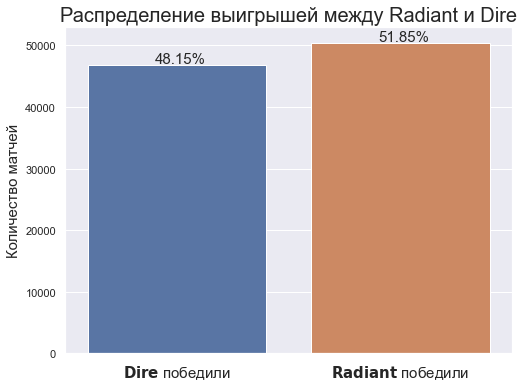

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y_train)
plt.title('Распределение выигрышей между Radiant и Dire', fontsize=20)
plt.xlabel('')
plt.ylabel('Количество матчей',  fontsize=15)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(y_train)*100),
                (p.get_x() + 0.3, p.get_height() + 300), fontsize=15)

plt.xticks([0, 1], 
           [r'$\bf{Dire}$' + ' победили', r'$\bf{Radiant}$' + ' победили'], 
           fontsize=15);

Распределение классов сбалансированное

## Пропущенные значения

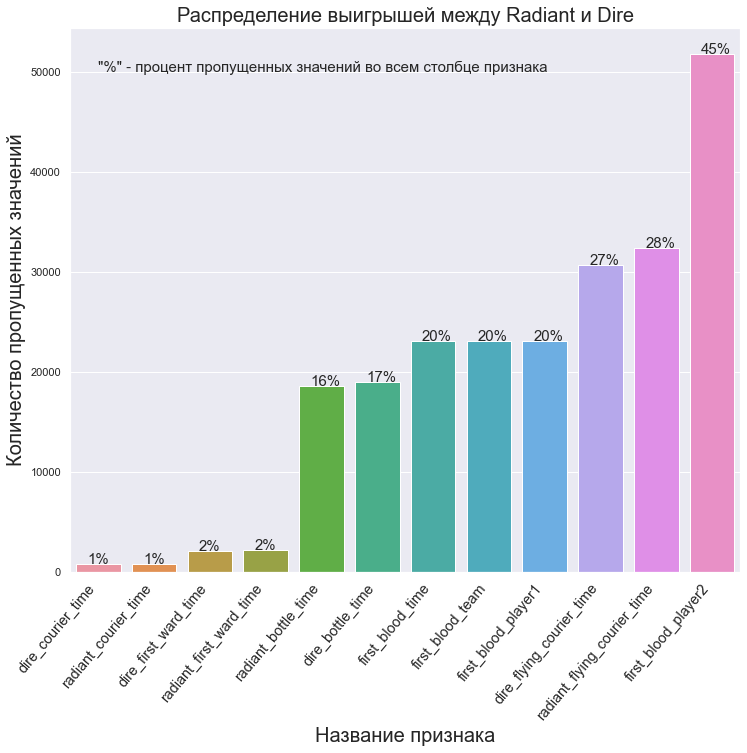

In [47]:
miss_data = all_data.isnull().sum()[all_data.isnull().sum() > 0].sort_values()
miss_data = pd.DataFrame(data={'feature_name': miss_data.index,
                               'num_of_missing': miss_data.values})
plt.figure(figsize=(12, 10)) 
ax = sns.barplot(x=miss_data['feature_name'], y=miss_data['num_of_missing'])

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(all_data)*100), 
                (p.get_x()+0.2, p.get_height()), fontsize=15)

plt.title('Распределение выигрышей между Radiant и Dire', fontsize=20)
plt.xlabel('Название признака', fontsize=20)
plt.ylabel('Количество пропущенных значений',  fontsize=20)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);
plt.text(0, 50000, '"%" - процент пропущенных значений во всем столбце признака', fontsize=15);

Посмотрим, какие значения принимают признаки с пропусками

In [48]:
def count_zero(x):
    """
    Возвращает количество объектов в Series, 
    которые равны нулю
    """
    return len(x[x == 0])

def count_neg(x):
    """
    Возвращает количество объектов в Series, 
    которые меньше нуля
    """
    return len(x[x < 0])

def count_pos(x):
    """
    Возвращает количество объектов в Series, 
    которые больше нуля
    """
    return len(x[x > 0])

# минимальное значение признака, количество отрицательных признаков, количество нулевых признаков,
# количество положительных признаков, максимальное значение признкака 
all_data[miss_data.feature_name].agg(['min', count_neg, count_zero, count_pos, 'max'])

,dire_courier_time,radiant_courier_time,dire_first_ward_time,radiant_first_ward_time,radiant_bottle_time,dire_bottle_time,first_blood_time,first_blood_team,first_blood_player1,dire_flying_courier_time,radiant_flying_courier_time,first_blood_player2
min,-90.0,-90.0,-84.0,-236.0,-37.0,-45.0,-78.0,0.0,0.0,180.0,180.0,0.0
count_neg,113019.0,112980.0,74640.0,72344.0,107.0,149.0,10163.0,0.0,0.0,0.0,0.0,0.0
count_zero,1.0,6.0,1007.0,1052.0,39.0,47.0,785.0,43638.0,9092.0,0.0,0.0,6609.0
count_pos,581.0,602.0,36671.0,38845.0,95675.0,95226.0,80354.0,47664.0,82210.0,83785.0,82043.0,56045.0
max,296.0,300.0,300.0,300.0,300.0,300.0,300.0,1.0,9.0,300.0,300.0,9.0


 - Признак `first_blood_team` 
   - принимает значение равное `0`, когда __Radiant__ совершает событие _"first blood"_ первой
   - принимает значение равное `1`, когда __Dire__ совершает событие _"first blood"_ первой
   - принимает значение `NaN`, когда ни одна из команд не совершает событие _"first blood"_ за первые 5 минут матча

In [49]:
all_data.first_blood_team.value_counts(dropna=False)

1.0    47664
0.0    43638
NaN    23105
Name: first_blood_team, dtype: int64

- Признак `first_blood_time` - игровое время первой крови
   - Данный признак может принимать отрицательные значения, так как точка отсчета игрового времени (ноль) начинается через несколько минут после фактического начала матча. Следовательно, если данный признак принимает значение `0`, то это еще не значит, что события _"first blood"_ не было. 

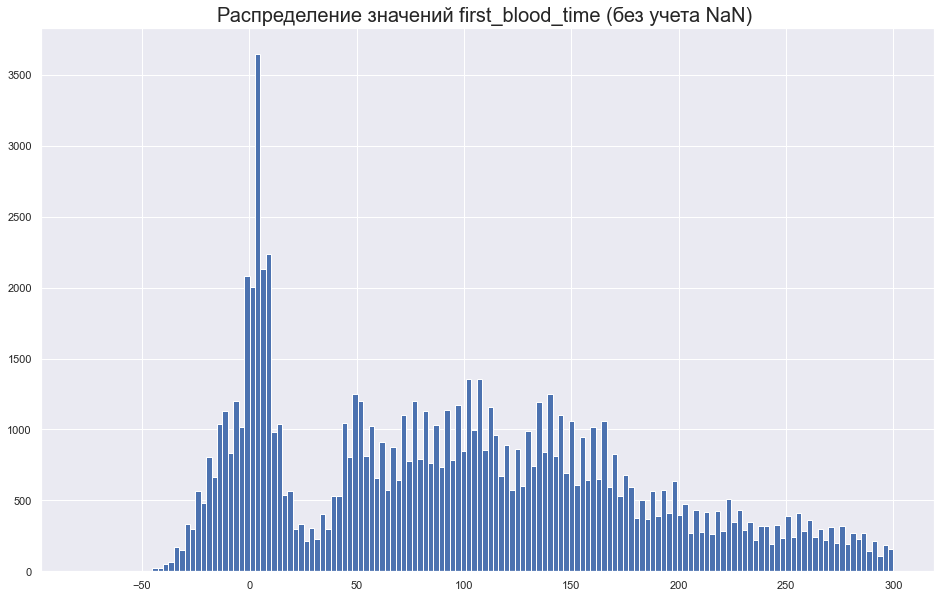

In [50]:
plt.figure(figsize=(16, 10)) 
all_data.first_blood_time.hist(bins=150)
plt.title('Распределение значений first_blood_time (без учета NaN) ', 
          fontsize=20);

- Признак `first_blood_player1` - игрок, причастный к событию _"first blood"_
- Признак `first_blood_player2` - второй игрок, причастный к событию _"first blood"_
   - Данные признаки могут принимать значения ∈ __[0; 9]__, причем эти признаки никогда не принимают одинаковые значения, т.к. событие _"first blood"_ не может быть отнесено к одному и тому же игроку. Также если `first_blood_player1` ∈ __[0; 4]__, то признак `first_blood_player2` уже не может принимать значения из этого же диапозона и наоборот. Аналагично и для __[5; 9]__.
   - Это связано с тем, что событие _"first blood"_ не может быть совершено по отношению к игроку, находящемуся в той же команде. Отсюда следует, что если значение `first_blood_player1` ∈ __[0; 4]__, то к событию _"first blood"_ причастен игрок из команды __Radiant__, если  ∈ __[5; 9]__, то к событию _"first blood"_ причастен игрок из команды __Dire__
   - Также следует заметить, что если `first_blood_player1` не `NaN`, то `first_blood_player2` может принимать принимать значение `NaN` - это связано с тем, что игрок убил не героя

NaN    13728
6.0     6040
5.0     6020
7.0     5971
9.0     5950
8.0     5929
Name: first_blood_player2, dtype: int64


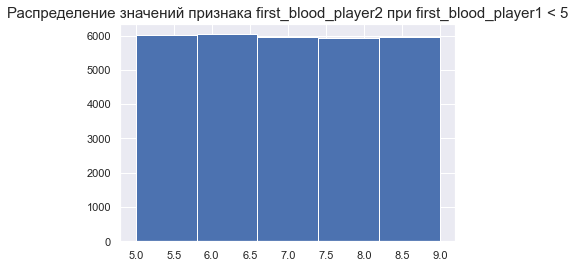

In [51]:
print(all_data[all_data.first_blood_player1 < 5].first_blood_player2\
      .value_counts(dropna=False))
plt.title('Распределение значений признака first_blood_player2 при first_blood_player1 < 5', 
          fontsize=15)
all_data[all_data.first_blood_player1 < 5].first_blood_player2.hist(bins=5);

5.0    6614
9.0    6577
8.0    6560
7.0    6497
6.0    6496
Name: first_blood_player1, dtype: int64


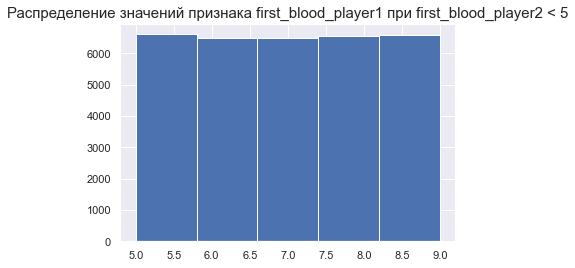

In [52]:
print(all_data[all_data.first_blood_player2 < 5].first_blood_player1\
      .value_counts(dropna=False))
plt.title('Распределение значений признака first_blood_player1 при first_blood_player2 < 5', 
          fontsize=15)
all_data[all_data.first_blood_player2 < 5].first_blood_player1.hist(bins=5);

0.0    6193
2.0    5999
1.0    5980
4.0    5885
3.0    5853
Name: first_blood_player1, dtype: int64


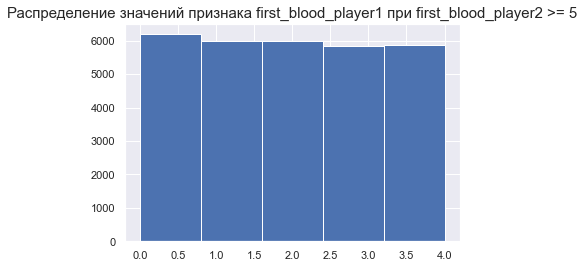

In [53]:
print(all_data[all_data.first_blood_player2 >= 5].first_blood_player1\
      .value_counts(dropna=False))
plt.title('Распределение значений признака first_blood_player1 при first_blood_player2 >= 5', 
          fontsize=15)
all_data[all_data.first_blood_player2 >= 5].first_blood_player1.hist(bins=5);

NaN    14920
0.0     6609
1.0     6604
3.0     6563
2.0     6530
4.0     6438
Name: first_blood_player2, dtype: int64


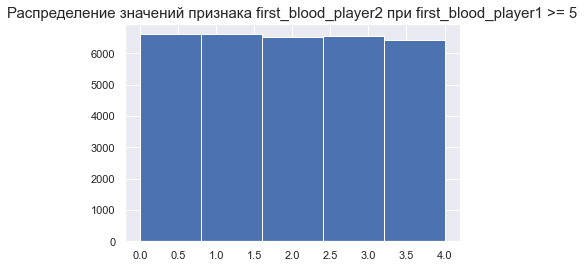

In [54]:
print(all_data[all_data.first_blood_player1 >= 5].first_blood_player2\
      .value_counts(dropna=False))
plt.title('Распределение значений признака first_blood_player2 при first_blood_player1 >= 5',
          fontsize=15)
all_data[all_data.first_blood_player1 >= 5].first_blood_player2.hist(bins=5);

События _"first blood"_ не было, если признак `first_blood_team` принимает значение `NaN`. Отсюда следует, что признаки `first_blood_player1`, `first_blood_player2`, `first_blood_time` также принимают значение `NaN` одновременно с `first_blood_team`

- Из признаков, относящихся к событию _"first blood"_ , можно выделить новые признаки, а именно добавить признак:
  - `r_kill_not_hero`, который принимает значение `1`, если игрок команды __Radiant__ убил не героя, `0`- когда события _"first blood"_ не было
  - `d_kill_not_hero`, который принимает значение `1`, если игрок команды __Dire__ убил не героя, `0`- когда события _"first blood"_ не было
  - `r_kill_hero`, который принимает значение `1`, если игрок команды __Radiant__ убил героя команды __Dire__, `0`- когда события _"first blood"_ не было
  - `d_kill_hero`, который принимает значение `1`, если игрок команды __Dire__ убил героя команды __Radiant__, `0`- когда события _"first blood"_ не было

- После добавления данных признаков от признаков `first_blood_team`, `first_blood_player1`, `first_blood_player2`, `first_blood_time` можно избавиться

In [56]:
#добавление новых признаков
all_data['r_kill_not_hero'] = all_data.apply(lambda x: 1 if x.first_blood_player1 < 5 
                                             and np.isnan(x.first_blood_player2) else 0, 
                                             axis=1)
all_data['d_kill_not_hero'] = all_data.apply(lambda x: 1 if x.first_blood_player1 >= 5 
                                             and np.isnan(x.first_blood_player2) else 0, 
                                             axis=1)
all_data['r_kill_hero'] = all_data.apply(lambda x: 1 if x.first_blood_player1 < 5 
                                             and not np.isnan(x.first_blood_player2) else 0, 
                                         axis=1)
all_data['d_kill_hero'] = all_data.apply(lambda x: 1 if x.first_blood_player1 >= 5 
                                             and not np.isnan(x.first_blood_player2) else 0,
                                         axis=1)

In [57]:
# удаление старых признаков
columns_to_drop_first_blood = ['first_blood_team', 'first_blood_player1', 
                               'first_blood_player2', 'first_blood_time']
all_data.drop(columns=columns_to_drop_first_blood, 
              axis='columns', inplace=True)

Посмотрим на распределение оставшихся признаков с пропусками

,dire_courier_time,radiant_courier_time
count,113601.000000,113588.000000
mean,-80.249593,-80.069330
std,14.998597,15.773694
min,-90.000000,-90.000000
25%,-86.000000,-86.000000
50%,-84.000000,-83.000000
75%,-79.000000,-79.000000
max,296.000000,300.000000


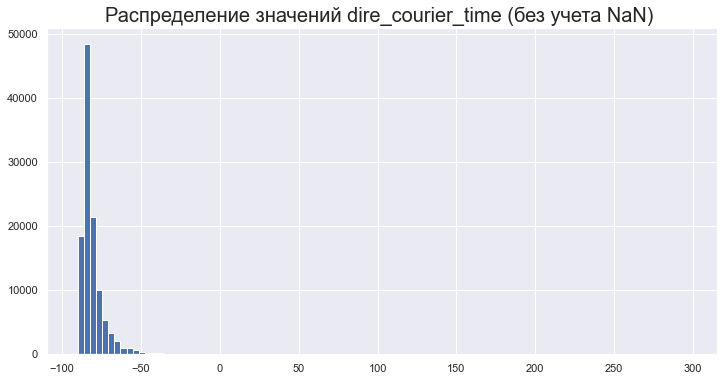

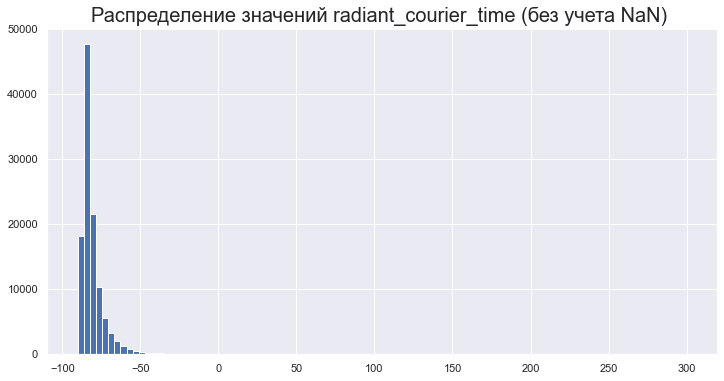

In [59]:
plt.figure(figsize=(12, 6)) 
all_data.dire_courier_time.hist(bins=100)
plt.title('Распределение значений dire_courier_time (без учета NaN) ', 
          fontsize=20);
plt.figure(figsize=(12, 6)) 
all_data.radiant_courier_time.hist(bins=100)
plt.title('Распределение значений radiant_courier_time (без учета NaN) ', 
          fontsize=20);
display(all_data[['dire_courier_time', 'radiant_courier_time']].describe())

Данные признаки в основном ∈ __[-86; -79]__

,dire_flying_courier_time,radiant_flying_courier_time
count,83785.00000,82043.000000
mean,214.84872,216.022415
std,34.14431,34.606946
min,180.00000,180.000000
25%,185.00000,186.000000
50%,203.00000,204.000000
75%,238.00000,241.000000
max,300.00000,300.000000


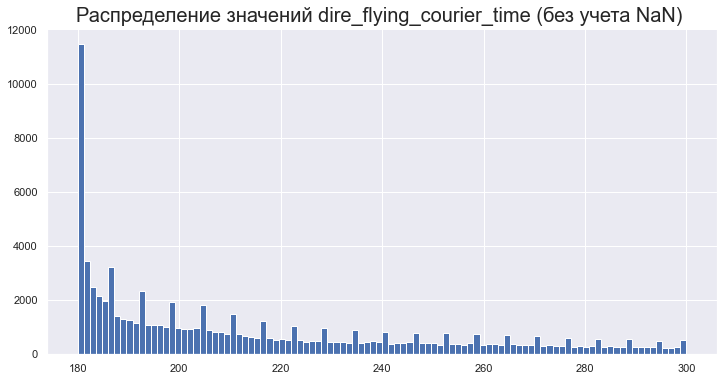

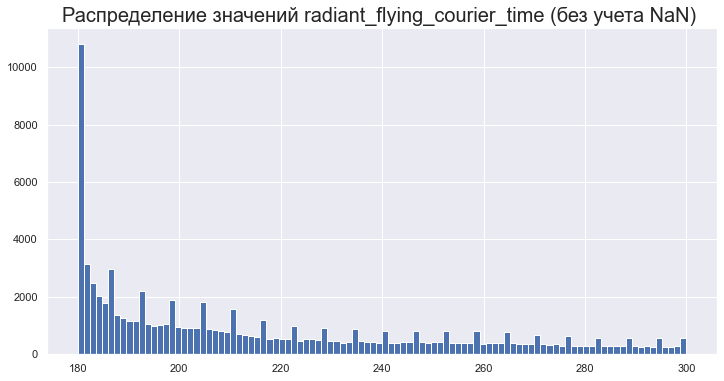

In [60]:
plt.figure(figsize=(12, 6)) 
all_data.dire_flying_courier_time.hist(bins=100)
plt.title('Распределение значений dire_flying_courier_time (без учета NaN) ',
          fontsize=20);
plt.figure(figsize=(12, 6)) 
all_data.radiant_flying_courier_time.hist(bins=100)
plt.title('Распределение значений radiant_flying_courier_time (без учета NaN) ', 
          fontsize=20);
display(all_data[['dire_flying_courier_time', 'radiant_flying_courier_time']]\
        .describe())

Данные признаки в основном ∈ __[185; 241]__

,dire_first_ward_time,radiant_first_ward_time
count,112318.000000,112241.000000
mean,-7.021724,-6.762939
std,40.528909,39.643731
min,-84.000000,-236.000000
25%,-31.000000,-31.000000
50%,-16.000000,-15.000000
75%,8.000000,10.000000
max,300.000000,300.000000


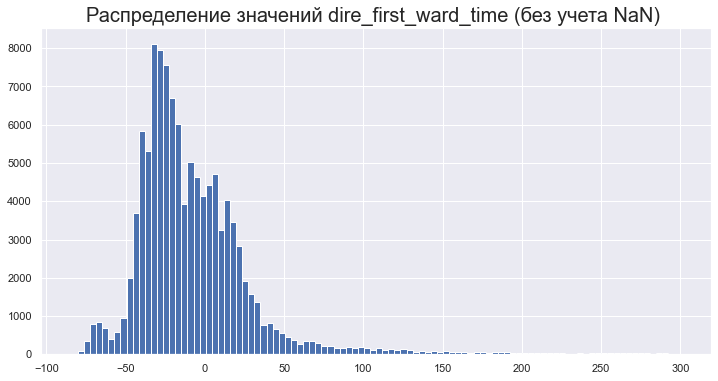

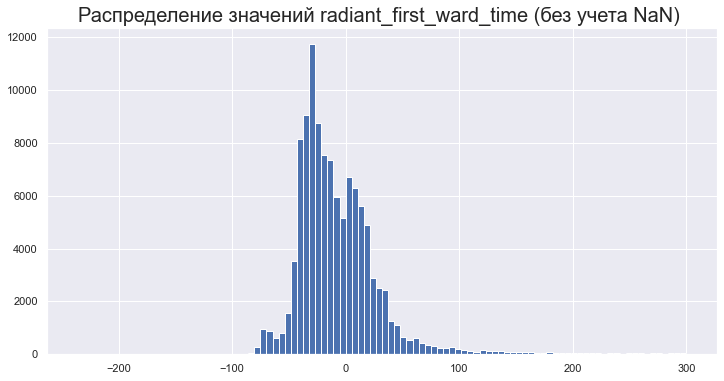

In [61]:
plt.figure(figsize=(12, 6)) 
all_data.dire_first_ward_time.hist(bins=100)
plt.title('Распределение значений dire_first_ward_time (без учета NaN) ',
          fontsize=20);
plt.figure(figsize=(12, 6)) 
all_data.radiant_first_ward_time.hist(bins=100)
plt.title('Распределение значений radiant_first_ward_time (без учета NaN) ',
          fontsize=20);
display(all_data[['dire_first_ward_time', 'radiant_first_ward_time']]\
        .describe())

Данные признаки в основном ∈ __[-31; 10]__

,dire_bottle_time,radiant_bottle_time
count,95422.000000,95821.000000
mean,127.236843,126.843542
std,62.360112,61.525832
min,-45.000000,-37.000000
25%,83.000000,84.000000
50%,131.000000,131.000000
75%,165.000000,164.000000
max,300.000000,300.000000


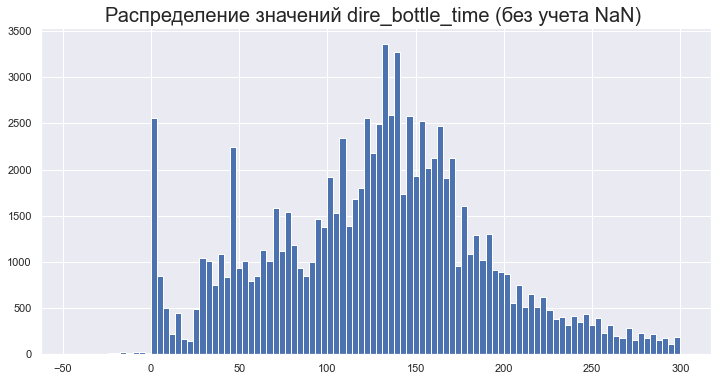

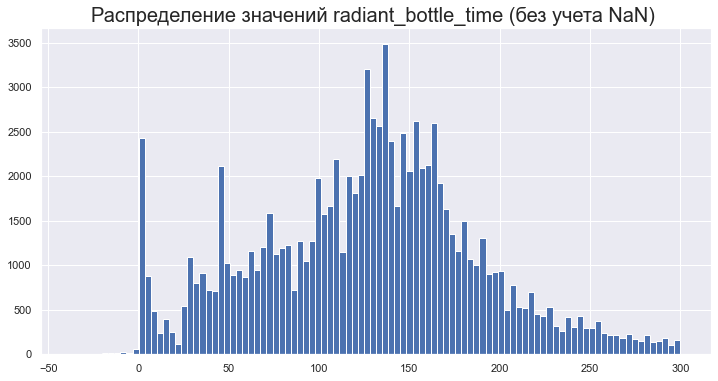

In [62]:
plt.figure(figsize=(12, 6)) 
all_data.dire_bottle_time.hist(bins=100)
plt.title('Распределение значений dire_bottle_time (без учета NaN) ',
          fontsize=20);
plt.figure(figsize=(12, 6)) 
all_data.radiant_bottle_time.hist(bins=100)
plt.title('Распределение значений radiant_bottle_time (без учета NaN) ', 
          fontsize=20);
display(all_data[['dire_bottle_time', 'radiant_bottle_time']].describe())

Данные признаки в основном ∈ __[83; 165]__

Я считаю, для значений данных признаков нужно выделить минуту.
Для этого я написал функцию `select_minute`

In [63]:
def select_minute(time_sec):
    """
    Принимает time_sec - время события в секундах
    Возвращает целое значение:
        -10 - если значение является пропущеным
        time_sec//60 - если значение указано
    """
    return -10 if np.isnan(time_sec) else time_sec//60

In [64]:
# признаки, которые будет перадавать в функцию
columns_for_func = ['dire_courier_time', 'radiant_courier_time',
                    'dire_flying_courier_time', 'radiant_flying_courier_time',
                    'dire_first_ward_time', 'radiant_first_ward_time', 
                    'dire_bottle_time', 'radiant_bottle_time']

# преобразование признаков
for col_name in columns_for_func:
    all_data[col_name] = all_data[col_name].apply(select_minute)

In [65]:
print('Количество признаков с пропущенными значениями: ',
      (all_data.isnull().sum() > 0).sum())

Количество признаков с пропущенными значениями:  0


# Анализ признаков для каждой команды

## tpscroll
[__Town Portal Scroll__ ](https://dota2-ru.gamepedia.com/Town_Portal_Scroll)

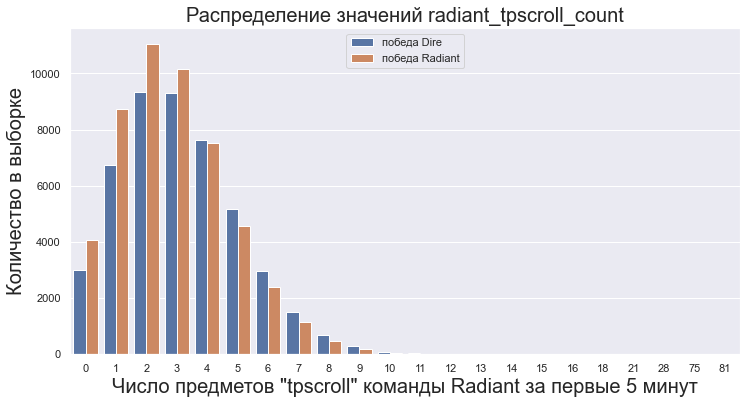

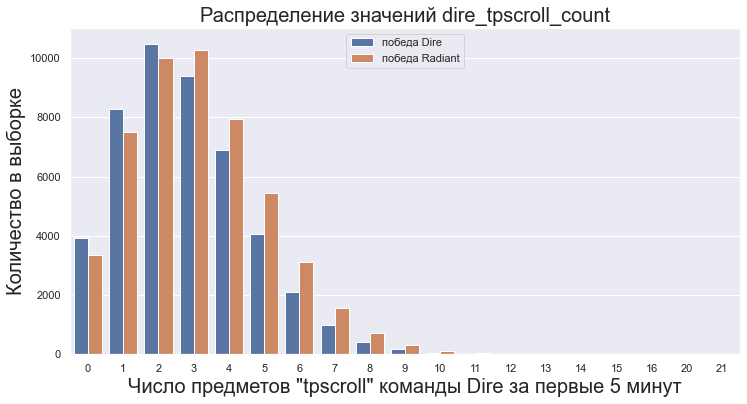

In [66]:
plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений radiant_tpscroll_count', fontsize=20);
sns.countplot(data=train_with_ans, x='radiant_tpscroll_count',
              hue='radiant_win')
plt.xlabel('Число предметов "tpscroll" команды Radiant за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'])

plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений dire_tpscroll_count', fontsize=20);
sns.countplot(data=train_with_ans, x='dire_tpscroll_count', 
              hue='radiant_win')
plt.xlabel('Число предметов "tpscroll" команды Dire за первые 5 минут',
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant']);

Данный предмет позволяет телепортироваться персонажу. Как можно заметить, небольшое количество `tpcroll` (< 3,4) возможно влияет на победу команды, но при бóльших значениях эффект получается противоположным

## boots
__[Boots of Speed](https://dota2-ru.gamepedia.com/Boots_of_Speed)__

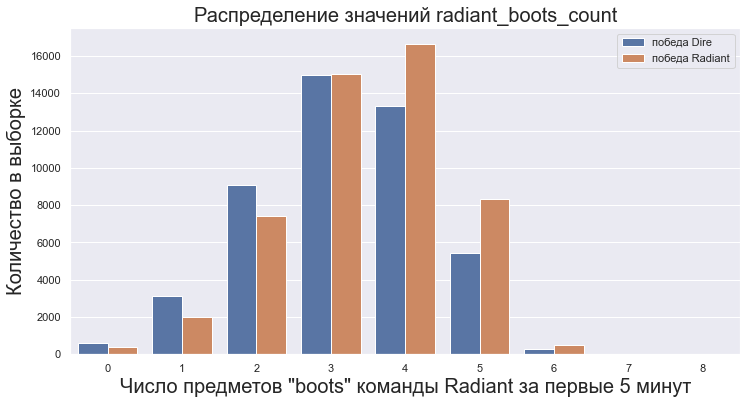

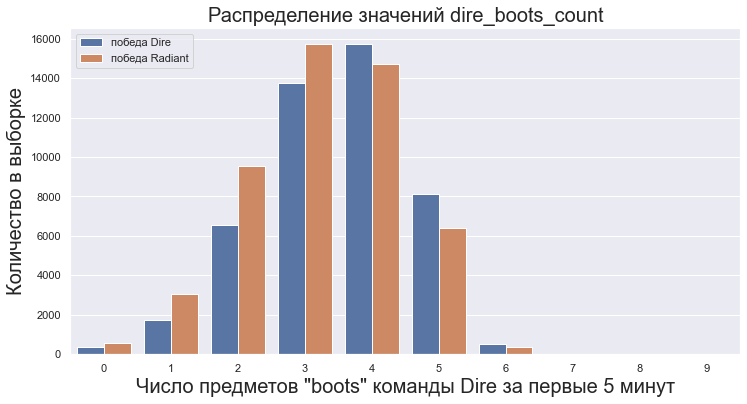

In [67]:
plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений radiant_boots_count',
          fontsize=20);
sns.countplot(data=train_with_ans, x='radiant_boots_count', 
              hue='radiant_win');
plt.xlabel('Число предметов "boots" команды Radiant за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'])

plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений dire_boots_count', 
          fontsize=20);
sns.countplot(data=train_with_ans, x='dire_boots_count', 
              hue='radiant_win');
plt.xlabel('Число предметов "boots" команды Dire за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant']);

Данный предмет позволяет персонажу двигаться быстрее. Как можно заметить, небольшое количество `boots` (< 3) особо не влияет на победу команды, но при бóльших значениях эффект получается противоположным

## ward observer
__[Observer Ward](https://dota2-ru.gamepedia.com/Observer_Ward)__

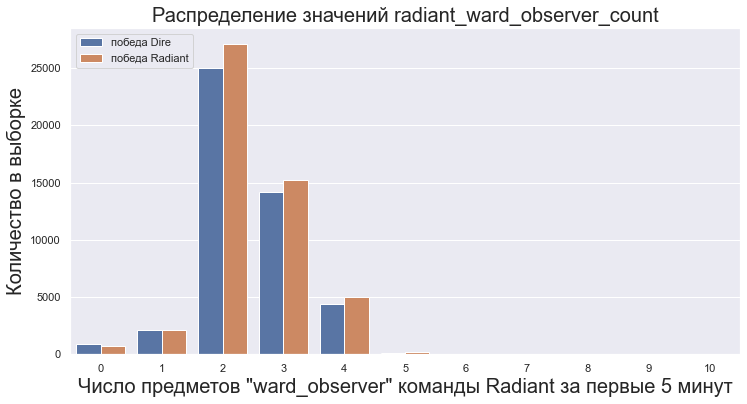

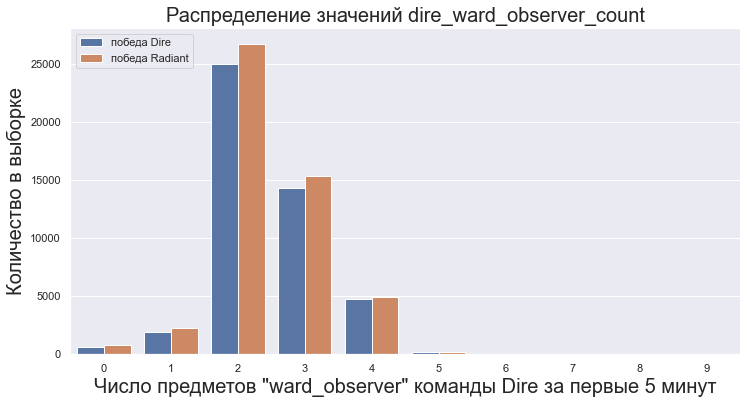

In [68]:
plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений radiant_ward_observer_count', 
          fontsize=20);
sns.countplot(data=train_with_ans, x='radiant_ward_observer_count',
              hue='radiant_win');
plt.xlabel('Число предметов "ward_observer" команды Radiant за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'])

plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений dire_ward_observer_count', 
          fontsize=20);
sns.countplot(data=train_with_ans, x='dire_ward_observer_count',
              hue='radiant_win');
plt.xlabel('Число предметов "ward_observer" команды Dire за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant']);

Устанавливает невидимого дозорного — вард, который даёт наземный обзор в радиусе 1600. Действует 6 мин. Как можно заметить, количество `ward_observer` не влияет на победу команды __Dire__. 

Рассмотрим случаи, когда количество `ward_observer` команды __Dire__ больше, чем команды __Radiant__

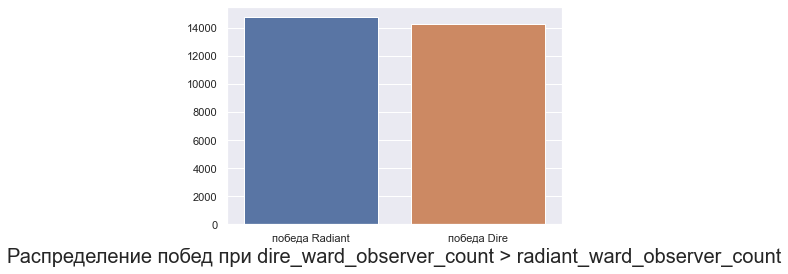

In [69]:
ward_observer_data = train_with_ans[train_with_ans.dire_ward_observer_count >
                                    train_with_ans.radiant_ward_observer_count]\
                     .radiant_win.value_counts()
plt.xlabel('Распределение побед при dire_ward_observer_count > radiant_ward_observer_count', 
           fontsize=20)
sns.barplot(x=['победа Radiant','победа Dire'], y=ward_observer_data.values);

Рассмотрим случаи, когда количество `ward_observer` команды __Radiant__ больше, чем команды __Dire__

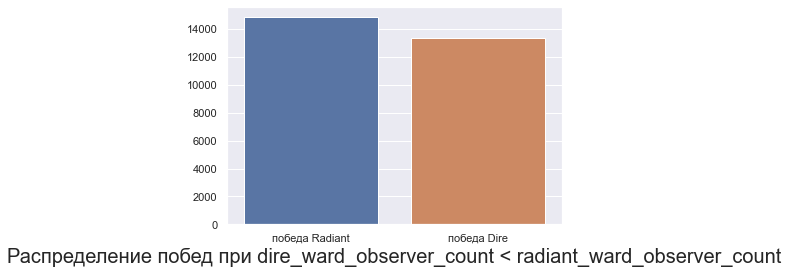

In [70]:
ward_observer_data = train_with_ans[train_with_ans.dire_ward_observer_count <
                                    train_with_ans.radiant_ward_observer_count]\
                     .radiant_win.value_counts()
plt.xlabel('Распределение побед при dire_ward_observer_count < radiant_ward_observer_count',  
           fontsize=20)
sns.barplot(x=['победа Radiant','победа Dire'], y=ward_observer_data.values);

В обоих случаях, несмотря на количество `ward_observer`, побеждает __Radiant__

## ward sentry
__[Sentry Ward](https://dota2-ru.gamepedia.com/Sentry_Ward)__

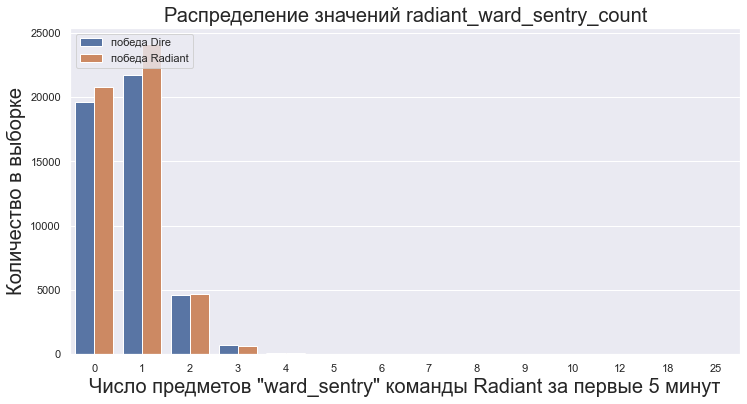

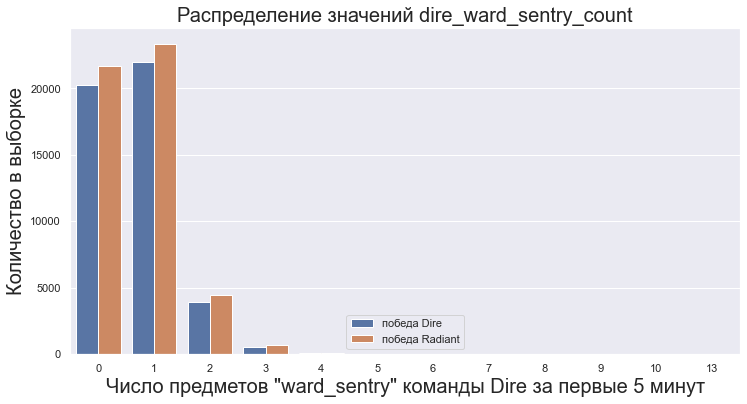

In [71]:
plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений radiant_ward_sentry_count',
          fontsize=20);
sns.countplot(data=train_with_ans, x='radiant_ward_sentry_count',
              hue='radiant_win');
plt.xlabel('Число предметов "ward_sentry" команды Radiant за первые 5 минут',
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'])

plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений dire_ward_sentry_count',
          fontsize=20);
sns.countplot(data=train_with_ans, x='dire_ward_sentry_count', 
              hue='radiant_win');
plt.xlabel('Число предметов "ward_sentry" команды Dire за первые 5 минут',
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant']);

Устанавливает невидимого дозорного — вард, который имеет способность True Sight, в радиусе 1000 раскрывающую невидимых существ и варды в вашей видимости. Действует 6 мин. Как можно заметить, количество `ward_sentry` не влияет на победу команды __Dire__. 

- Объединим `radiant_ward_sentry_count` и `radiant_ward_observer_count` в `radiant_ward_sum`
- Объединим `dire_ward_sentry_count` и `dire_ward_observer_count` в `dire_ward_sum`

In [73]:
train_with_ans['dire_ward_sum'] = train_with_ans.dire_ward_observer_count + \
    train_with_ans.dire_ward_sentry_count
train_with_ans['radiant_ward_sum'] = train_with_ans.radiant_ward_observer_count + \
    train_with_ans.radiant_ward_sentry_count

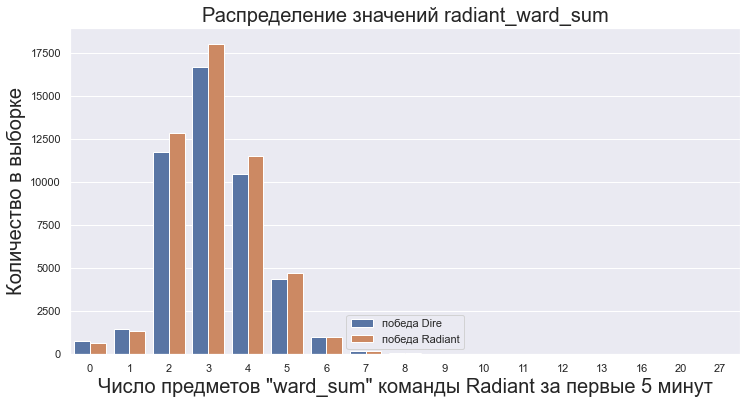

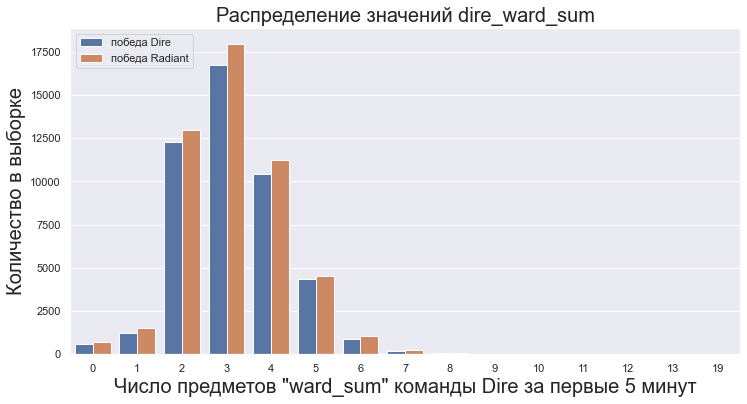

In [74]:
plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений radiant_ward_sum', 
          fontsize=20);
sns.countplot(data=train_with_ans, x='radiant_ward_sum', 
              hue='radiant_win');
plt.xlabel('Число предметов "ward_sum" команды Radiant за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'])

plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений dire_ward_sum',
          fontsize=20);
sns.countplot(data=train_with_ans, x='dire_ward_sum',
              hue='radiant_win');
plt.xlabel('Число предметов "ward_sum" команды Dire за первые 5 минут',
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant']);

Я считаю, что стоит добавить данные признаки в весь набор

In [75]:
all_data['dire_ward_sum'] = all_data.dire_ward_observer_count +\
                            all_data.dire_ward_sentry_count
all_data['radiant_ward_sum'] = all_data.radiant_ward_observer_count +\
                               all_data.radiant_ward_sentry_count

- Объединим `radiant_tpscroll_count` и `radiant_boots_count` в `radiant_tps_boots_sum`
- Объединим `dire_tpscroll_count` и `dire_boots_count` в `dire_tps_boots_sum`

In [76]:
train_with_ans['radiant_tps_boots_sum'] = train_with_ans.radiant_tpscroll_count + \
    train_with_ans.radiant_boots_count
train_with_ans['dire_tps_boots_sum'] = train_with_ans.dire_tpscroll_count + \
    train_with_ans.dire_boots_count

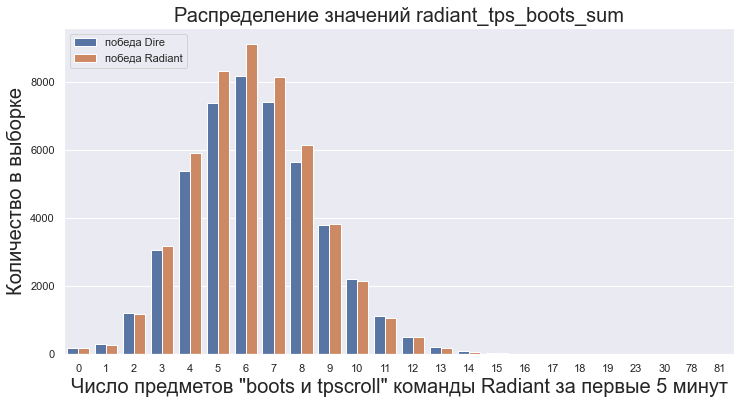

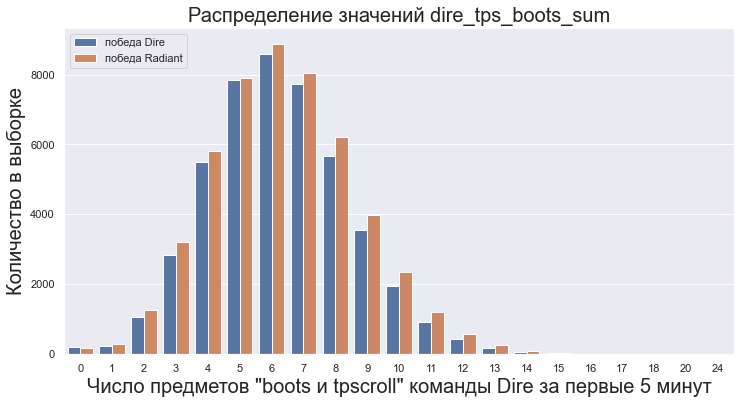

In [77]:
plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений radiant_tps_boots_sum', 
          fontsize=20);
sns.countplot(data=train_with_ans, x='radiant_tps_boots_sum', 
              hue='radiant_win');
plt.xlabel('Число предметов "boots и tpscroll" команды Radiant за первые 5 минут', 
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'])

plt.figure(figsize=(12, 6)) 
plt.title('Распределение значений dire_tps_boots_sum',
          fontsize=20);
sns.countplot(data=train_with_ans, x='dire_tps_boots_sum',
              hue='radiant_win');
plt.xlabel('Число предметов "boots и tpscroll" команды Dire за первые 5 минут',
           fontsize=20)
plt.ylabel('Количество в выборке',  fontsize=20)
plt.legend(['победа Dire', 'победа Radiant']);

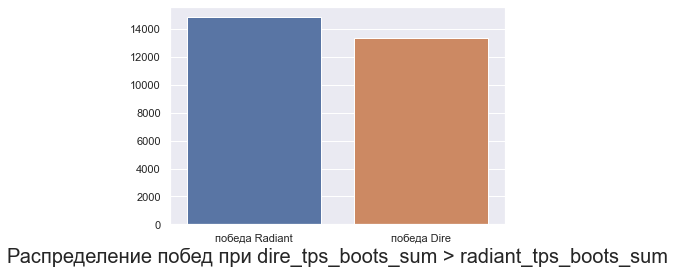

In [78]:
tps_boots_data = train_with_ans[train_with_ans.dire_tps_boots_sum  >
                                train_with_ans.radiant_tps_boots_sum]\
                 .radiant_win.value_counts()
plt.xlabel('Распределение побед при dire_tps_boots_sum > radiant_tps_boots_sum',
           fontsize=20)
sns.barplot(x=['победа Radiant','победа Dire'], y=ward_observer_data.values);

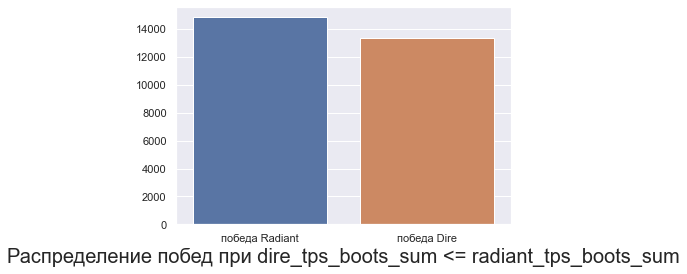

In [79]:
tps_boots_data = train_with_ans[train_with_ans.dire_tps_boots_sum  <=
                                train_with_ans.radiant_tps_boots_sum]\
                 .radiant_win.value_counts()
plt.xlabel('Распределение побед при dire_tps_boots_sum <= radiant_tps_boots_sum', 
           fontsize=20)
sns.barplot(x=['победа Radiant','победа Dire'], y=ward_observer_data.values);

Я считаю, что стоит добавить данные признаки в весь набор

In [80]:
all_data['radiant_tps_boots_sum'] = all_data.radiant_tpscroll_count +\
                                    all_data.radiant_boots_count
all_data['dire_tps_boots_sum'] = all_data.dire_tpscroll_count +\
                                 all_data.dire_boots_count

# Анализ признаков для каждого игрока

## rN_hero и dN_hero
где __N__ ∈ __[1; 5]__
Данный признак отражает номер героя игрока.

Посчитаем количество уникальных героев, которых выбирала команда __Radiant__ и __Dire__

In [81]:
# словари, в которых будет записано id героя и то, сколько раз данного героя выбирала
# команда Radiant и Dire соответственно
radiant_unique_heroes = {}
dire_unique_heroes = {}

for N in '12345':
    r_col_name = 'r' + N + '_hero'
    d_col_name = 'd' + N + '_hero'
    for hero_id, count in train[r_col_name].value_counts().items():
        if hero_id not in radiant_unique_heroes:
            radiant_unique_heroes[hero_id] = count
        else:
            radiant_unique_heroes[hero_id] += count
    for hero_id, count in train[d_col_name].value_counts().items():
        if hero_id not in dire_unique_heroes:
            dire_unique_heroes[hero_id] = count
        else:
            dire_unique_heroes[hero_id] += count

In [82]:
radiant_unique_heroes_df = pd.DataFrame(data={'quantity': list(radiant_unique_heroes.values())}, 
                                        index=radiant_unique_heroes.keys()).sort_index()
dire_unique_heroes_df = pd.DataFrame(data={'quantity': list(dire_unique_heroes.values())}, 
                                     index=dire_unique_heroes.keys()).sort_index()

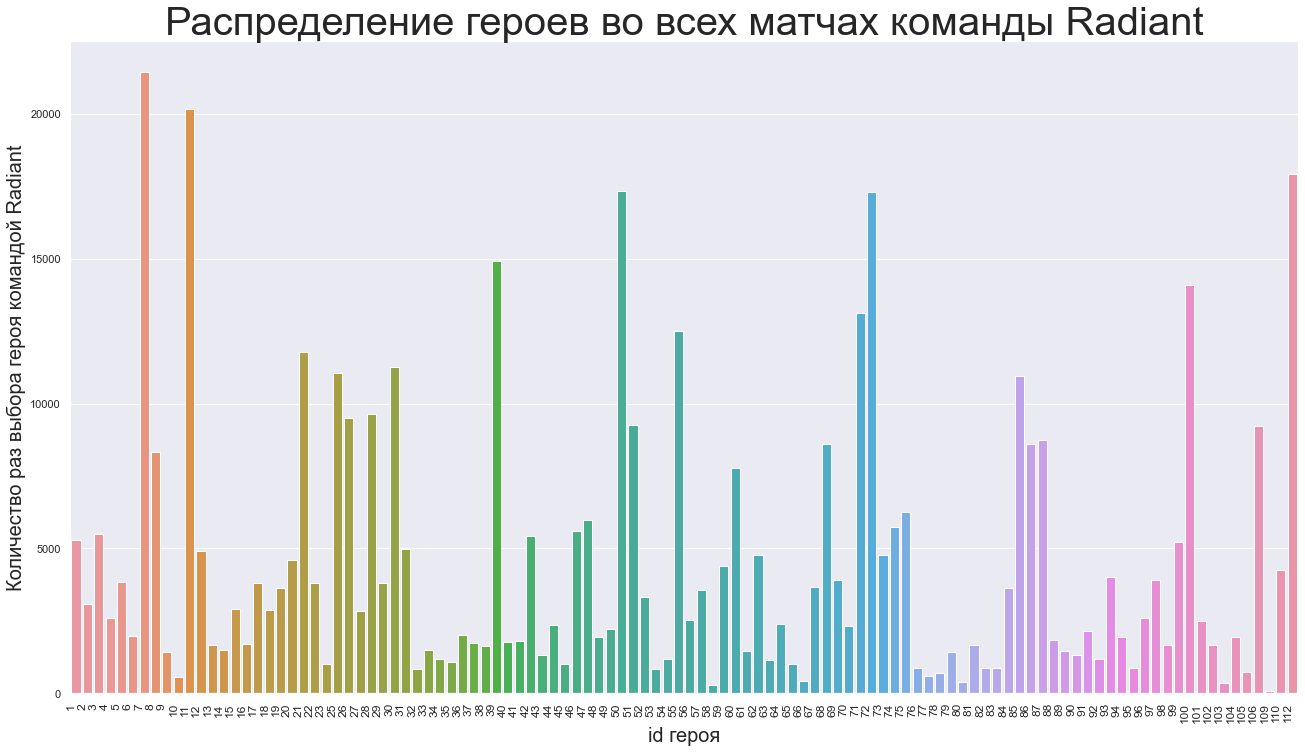

In [87]:
plt.figure(figsize=(22, 12)) 
plt.title('Распределение героев во всех матчах команды Radiant', fontsize=40);
sns.barplot(x=radiant_unique_heroes_df.index,
            y=radiant_unique_heroes_df.quantity)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=12  
)
plt.xlabel('id героя',  fontsize=20)
plt.ylabel('Количество раз выбора героя командой Radiant',  fontsize=20)
ax.set_xticks(np.arange(dire_unique_heroes_df.shape[0]) + 0.5, minor=False);

За многих героев играют намного чаще, чем за других

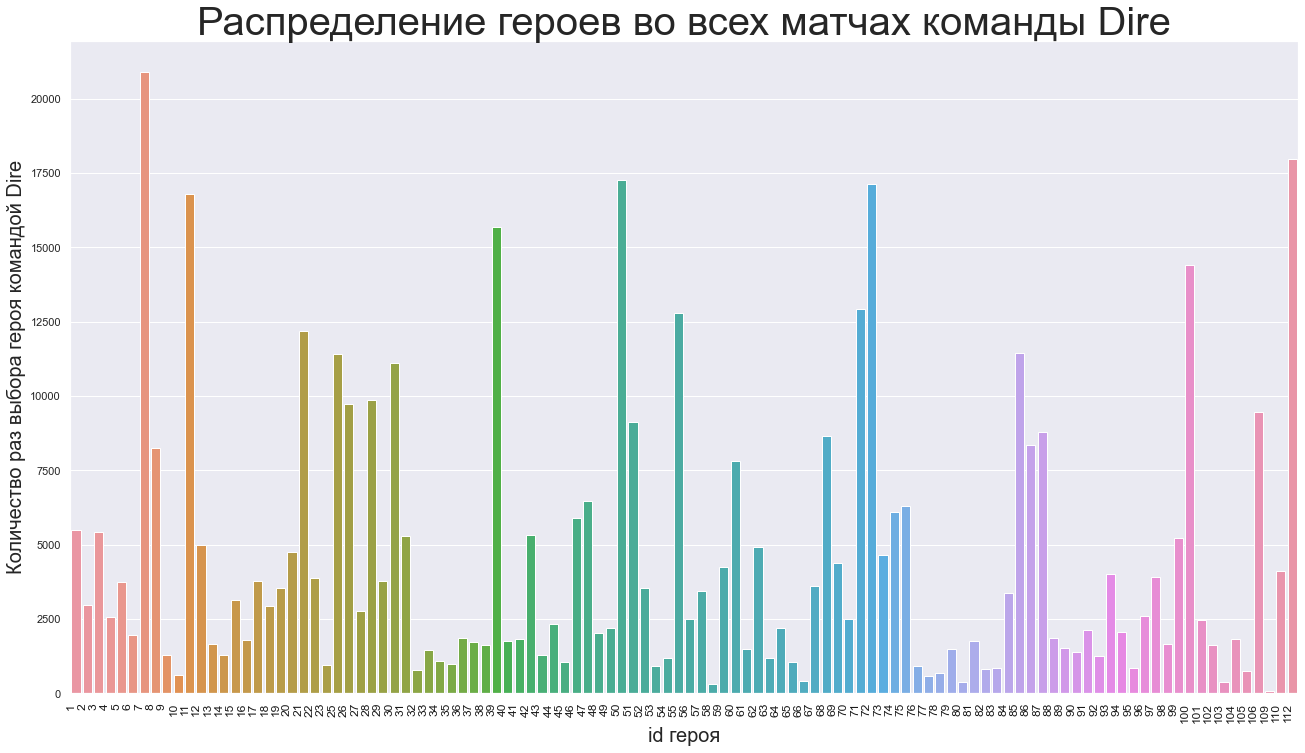

In [90]:
plt.figure(figsize=(22, 12)) 
plt.title('Распределение героев во всех матчах команды Dire', fontsize=40);
ax = sns.barplot(x=dire_unique_heroes_df.index, 
                 y=dire_unique_heroes_df.quantity)
plt.xticks(
    rotation=90, 
    color='k',
    horizontalalignment='right',
    fontweight='light',
    fontsize=12 
)
plt.xlabel('id героя',  fontsize=20)
plt.ylabel('Количество раз выбора героя командой Dire',  fontsize=20);

Распределение героев в командах __Radiant__ и __Dire__ по всем матчам практически одинаковое

Хотелось бы также отменить, что в каждом матче все герои (как команды __Radiant__, так и __Dire__) должны быть уникальными
Проверка всех героев на уникальнсть в каждом матче приведена ниже

In [91]:
all_data.iloc[:, range(2,75,8)].apply(lambda x: len(x.unique()) == 10, axis=1)\
        .sum() == all_data.shape[0]

True

Также стоит заметить, что множество всех героев, за которых играет команда __Radiant__, совпадает с множеством всех героев, за которых играет команда __Dire__

In [92]:
set(dire_unique_heroes_df.index) == set(radiant_unique_heroes_df.index)

True

Причем используются не все доступные герои

In [94]:
# загрузка всех доступных героев
heroes = pd.read_csv('data/dictionaries/heroes.csv', index_col='id')

In [95]:
print('Количество уникальных доступных героев: ', heroes.shape[0],
      '\nРазмер множества всех героев, которых используют в матчах: ', 
      len(radiant_unique_heroes_df.index))

Количество уникальных доступных героев:  112 
Размер множества всех героев, которых используют в матчах:  108


Каких героев не используют в матчах? 

In [96]:
set_of_all_heroes_id = set(heroes.index)
set_of_used_heroes_id = set(radiant_unique_heroes_df.index)
set_of_unused_heroes = set_of_all_heroes_id.difference(set_of_used_heroes_id)
display('Герои, которых не использовали ни в одном из матчей: ',
        heroes.loc[list(set_of_unused_heroes), ['localized_name']].sort_index())

'Герои, которых не использовали ни в одном из матчей: '

,localized_name
id,
107,Earth Spirit
108,Abyssal Underlord
111,Oracle
113,Arc Warden


__[Earth Spirit](https://dota2-ru.gamepedia.com/Earth_Spirit)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/b/be/Earth_Spirit_icon.png?version=6358ee2b1e31c856ff16cb7fb5e23f46)

__[Abyssal Underlord](https://dota2-ru.gamepedia.com/Underlord)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/1/18/Underlord_icon.png?version=608e265d917a1cb3ecbdb479ca17cfe9)

__[Oracle](https://dota2-ru.gamepedia.com/Oracle)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/7/72/Oracle_icon.png?version=50cfbd6e98b026808a9f8ad253605cfa)

__[Arc Warden](https://dota2-ru.gamepedia.com/Arc_Warden)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/0/07/Arc_Warden_icon.png?version=7ef22642fb6a42d09bc39601f19818ab)

Вносит ли какой-нибудь вклад тот или иной герой в выигрыш команды?
Для ответа на данный вопрос посчитаем количество выигрышей команды __Radiant__ и __Dire__ в зависимости от наличиная того или иного героя

In [97]:
def radiant_win_sum(x):
    return sum(x == 1)

def dire_win_sum(x):
    return sum(x == 0)

# массивы, куда будут записаны выиграши команды Radiant и Dire
# в зависимости от наличиная того или иного героя в команде
radiant_heroes_wins = np.zeros([radiant_unique_heroes_df.shape[0], 2])
dire_heroes_wins = np.zeros([radiant_unique_heroes_df.shape[0], 2])
for N in '12345':
    r_col_name = 'r' + N + '_hero'
    d_col_name = 'd' + N + '_hero'
    radiant_heroes_wins += train_with_ans.groupby(r_col_name, as_index=False).\
        radiant_win.agg([radiant_win_sum, dire_win_sum]).values
    dire_heroes_wins += train_with_ans.groupby(d_col_name, as_index=False).\
        radiant_win.agg([radiant_win_sum, dire_win_sum]).values

In [98]:
# добавим данные признаки в radiant_unique_heroes_df и dire_unique_heroes_df
radiant_unique_heroes_df['num_of_radiant_win'] = radiant_heroes_wins[:, 0].astype(int)
radiant_unique_heroes_df['num_of_dire_win'] = radiant_heroes_wins[:, 1].astype(int)
dire_unique_heroes_df['num_of_radiant_win'] = dire_heroes_wins[:, 0].astype(int)
dire_unique_heroes_df['num_of_dire_win'] = dire_heroes_wins[:, 1].astype(int)

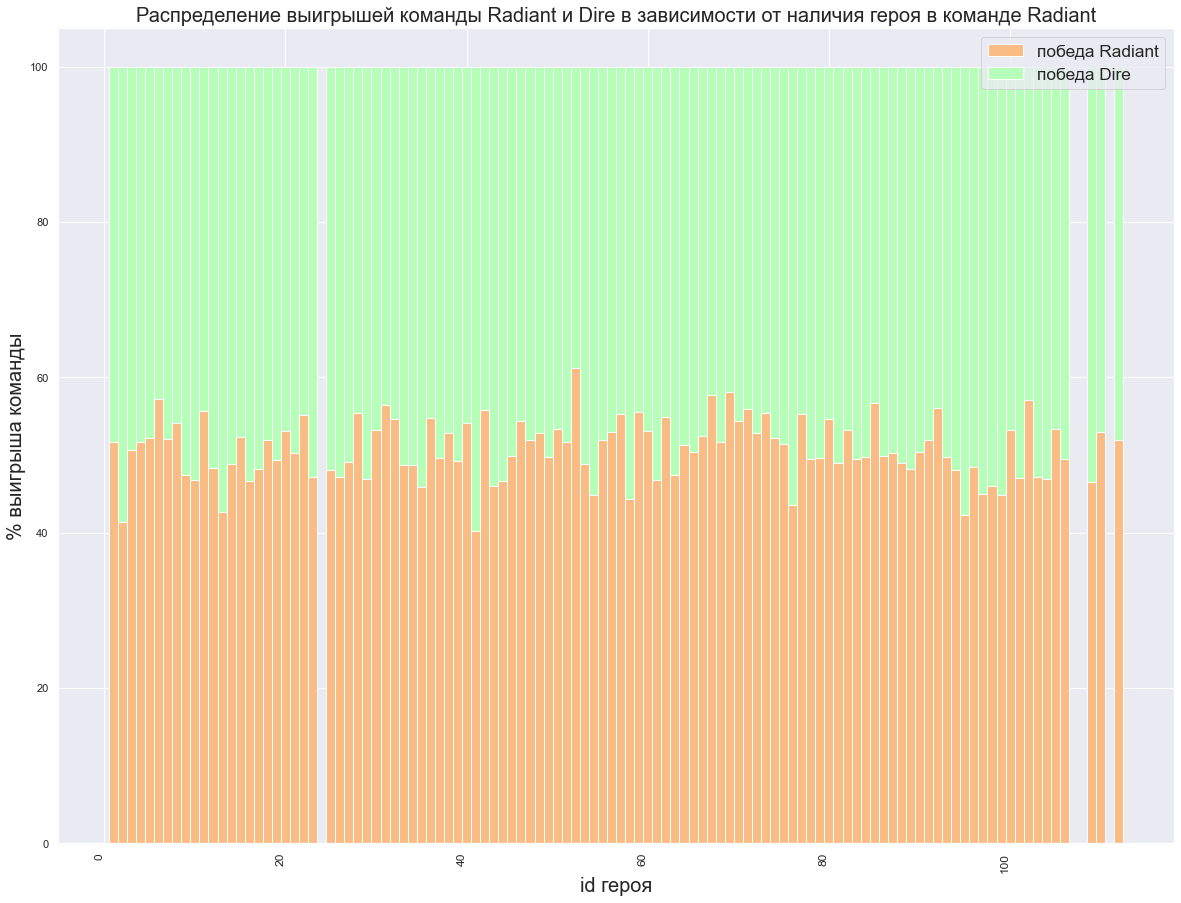

In [100]:
hero_id = radiant_unique_heroes_df.index
radiant_win = [i / j * 100 for i,j in zip(radiant_unique_heroes_df['num_of_radiant_win'], 
                                          radiant_unique_heroes_df['quantity'])]
dire_win = [i / j * 100 for i,j in zip(radiant_unique_heroes_df['num_of_dire_win'],
                                       radiant_unique_heroes_df['quantity'])]
barWidth = 1
plt.figure(figsize=(20, 15)) 
plt.bar(hero_id, radiant_win, color='#f9bc85', 
        edgecolor='white', width=barWidth)
plt.bar(hero_id, dire_win, bottom=radiant_win, color='#b5ffb9',
        edgecolor='white', width=barWidth)
plt.xlabel('id героя',  fontsize=20)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=12 
);
plt.ylabel('% выигрыша команды',  fontsize=20)
plt.title('Распределение выигрышей команды Radiant и Dire в зависимости от наличия героя в команде Radiant', 
          fontsize=20)
plt.legend(['победа Radiant', 'победа Dire'], fontsize='xx-large')
plt.show()

Наличие определенного героя в команде играет не большую роль в выигрыше, однако их сочитание может сыграть большую роль

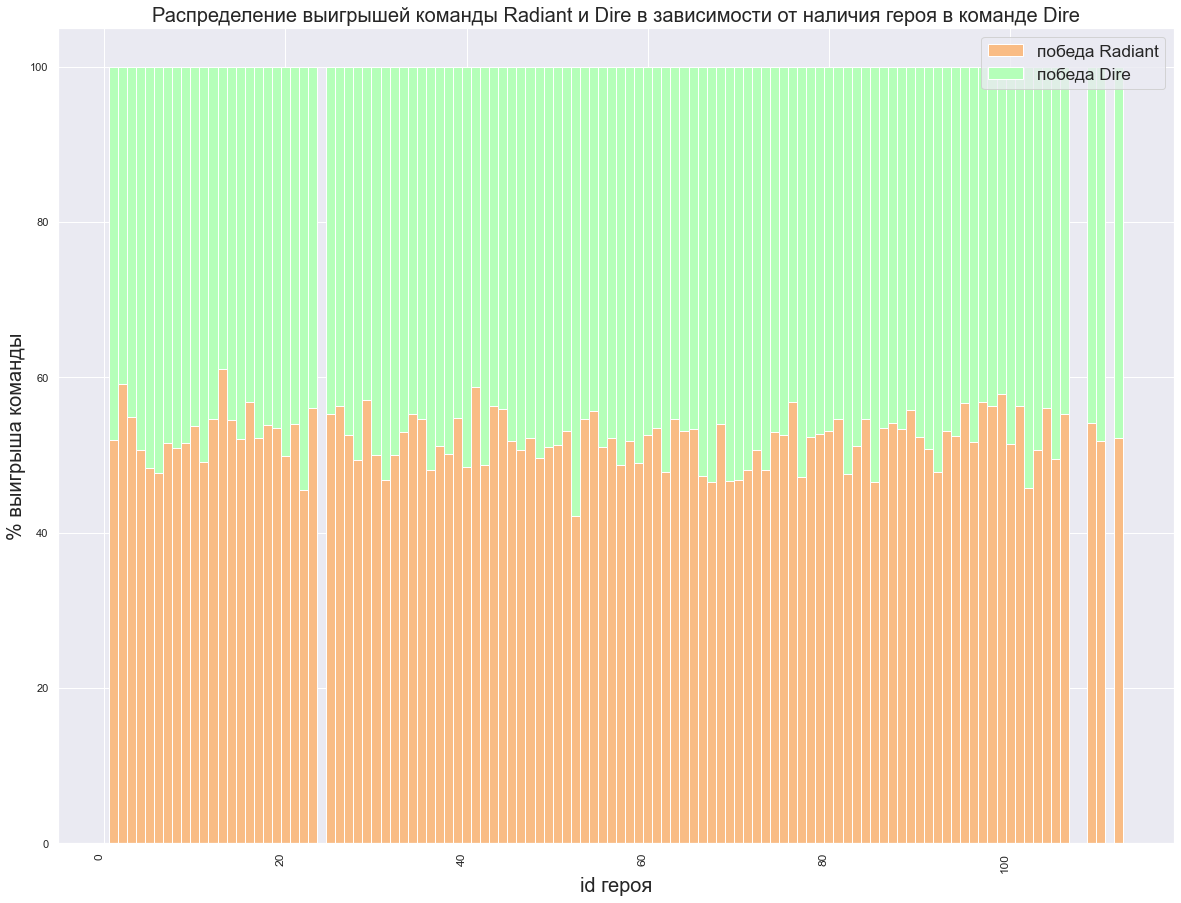

In [101]:
hero_id = dire_unique_heroes_df.index
radiant_win = [i / j * 100 for i,j in zip(dire_unique_heroes_df['num_of_radiant_win'], 
                                          dire_unique_heroes_df['quantity'])]
dire_win = [i / j * 100 for i,j in zip(dire_unique_heroes_df['num_of_dire_win'],
                                       dire_unique_heroes_df['quantity'])]
barWidth = 1
plt.figure(figsize=(20, 15)) 
plt.bar(hero_id, radiant_win, color='#f9bc85', edgecolor='white', width=barWidth)
plt.bar(hero_id, dire_win, bottom=radiant_win,
        color='#b5ffb9', edgecolor='white', width=barWidth)
plt.xlabel('id героя',  fontsize=20)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=12 
);
plt.ylabel('% выигрыша команды',  fontsize=20)
plt.title('Распределение выигрышей команды Radiant и Dire в зависимости от наличия героя в команде Dire', 
          fontsize=20)
plt.legend(['победа Radiant', 'победа Dire'], fontsize='xx-large')
plt.show()

Каких героев выбирают чаще всего? 

In [102]:
# найдем топ 10 самым часто выбираемых героев
top_10_pop_heroes = (radiant_unique_heroes_df.quantity + dire_unique_heroes_df.quantity) \
                        .sort_values(ascending=False)[0:10]

In [103]:
heroes.loc[top_10_pop_heroes.index, ['localized_name']]

,localized_name
7,Earthshaker
11,Shadow Fiend
112,Winter Wyvern
50,Dazzle
72,Gyrocopter
39,Queen of Pain
100,Tusk
71,Spirit Breaker
55,Dark Seer
21,Windranger


__[Earthshaker](https://dota2-ru.gamepedia.com/Earthshaker)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/a/a5/Earthshaker_icon.png?version=7f16a63e5ed6a7ec7a3889dd4aea354d)

__[Shadow Fiend](https://dota2-ru.gamepedia.com/Shadow_Fiend)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/3/36/Shadow_Fiend_icon.png?version=aead4589c97b4c486ca808225004b114)

__[Winter Wyvern](https://dota2-ru.gamepedia.com/Winter_Wyvern)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/4/4a/Winter_Wyvern_icon.png?version=708c1aac73eef23b9b9183d47484e7b2)

__[Dazzle](https://dota2-ru.gamepedia.com/Dazzle)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/e/e6/Dazzle_icon.png?version=12e839c1ea458185e87dcf7a7c02c0e6)

__[Gyrocopter](https://dota2-ru.gamepedia.com/Gyrocopter)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/4/4f/Gyrocopter_icon.png?version=f24686d2d018218824e5dc17c3e4dca1)

__[Queen of Pain](https://dota2-ru.gamepedia.com/Queen_of_Pain)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/a/a1/Queen_of_Pain_icon.png?version=d223991a573549d25a93703234869960)

__[Tusk](https://dota2-ru.gamepedia.com/Tusk)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/c/ce/Tusk_icon.png?version=147fb449a87e1067c85f21f186132092)

__[Spirit Breaker](https://dota2-ru.gamepedia.com/Spirit_Breaker)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/d/df/Spirit_Breaker_icon.png?version=166d65dd74ef0676fd3a12d1a1504e5d)

__[Dark Seer](https://dota2-ru.gamepedia.com/Dark_Seer)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/c/c5/Dark_Seer_icon.png?version=9b81b657518099522d6a36b5cdd51e7e)

__[Windranger](https://dota2-ru.gamepedia.com/Windranger)__
![](https://gamepedia.cursecdn.com/dota2_gamepedia/6/60/Windranger_icon.png?version=85593ee15f958babcf2f2d1ceb7a3940)

Для каждого игрока можно дополнительно узнать его атрибуты из файла `matches.jsonlines.bz2`, но пока что остановимся на том, что есть и посмотрим ниже как работает модель без этих данных

[Информация о matches](https://docs.opendota.com/#tag/heroes%2Fpaths%2F~1heroes%2Fget)

## rN_level и dN_level

Данный признак отображает максимальный достигнутый уровень того или иного героя матча(за первые 5 игровых минут)

Посмотрим какие значения может принимать данный признак и как он распределен

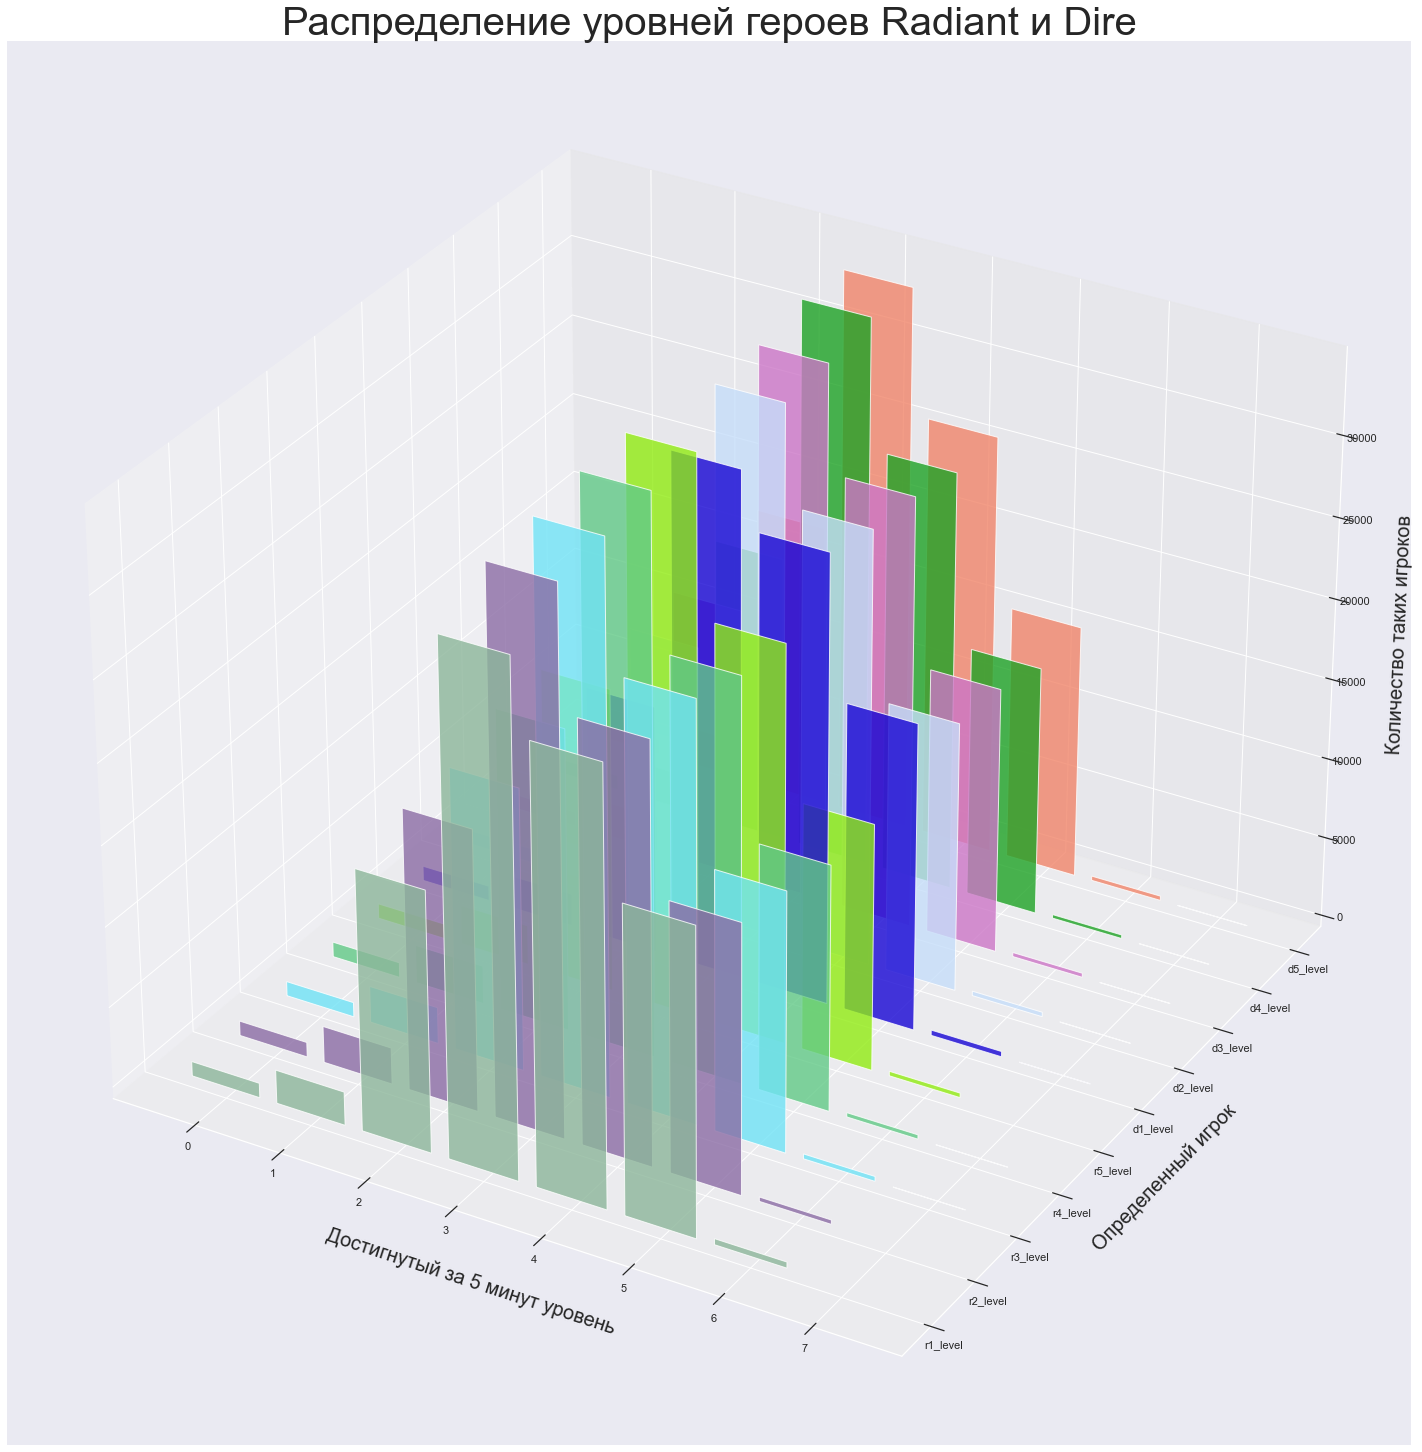

In [104]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

columns = train.columns[range(3,76,8)]
yticks = range(len(columns))
np.random.seed(0)

for k, column in zip(yticks, columns):
    dist = train.loc[:, column].value_counts(sort=False)
    xs = dist.index
    ys = dist.values
    ax.bar(xs, ys, zs=k, zdir='y', color=np.random.rand(3,), alpha=0.8)

plt.title('Распределение уровней героев Radiant и Dire', fontsize=40)
ax.set_xlabel('Достигнутый за 5 минут уровень', fontsize=20, labelpad=20)
ax.set_ylabel('Определенный игрок', fontsize=20, labelpad=20)
ax.set_zlabel('Количество таких игроков', fontsize=20, labelpad=20)
ax.set_yticks(yticks)
ax.set_yticklabels(columns)
ax.set_position([1, 1.3, 1, 1.3])

plt.show()

Чаще всего игроки успевают достичь героем 3 уровня, причем можно заметить, что довольно-таки много объектов принимают значение равное `0`. Посмотрим на весь пример, где данные характиристики принимают значение равное `0`

In [105]:
train[train.r1_level == 0].head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31,1430363469,7,26,0,914,825,4,0,0,4,14,1,1686,1255,11,1,2,6,85,2,533,968,4,0,0,4,41,1,1035,1405,16,0,0,6,99,1,1898,967,8,0,0,6,92,0,709,743,1,0,0,0,66,1,1006,1354,18,0,0,10,52,2,1848,1641,20,0,0,4,91,1,618,876,0,0,0,7,110,1,1364,1653,12,1,0,11,6.0,1.0,9.0,NaN,154.0,-41.0,NaN,1,3,0,0,NaN,55.0,-83.0,NaN,5,4,2,0,-15.0
158,1430474472,1,63,0,1435,1149,5,1,1,8,101,0,637,499,0,0,0,7,11,1,1856,1589,22,0,1,8,7,1,521,538,1,0,0,10,15,1,1246,1184,17,0,0,15,17,2,1893,1622,13,1,0,7,55,0,1842,848,8,0,0,7,93,1,1665,1945,26,1,1,8,2,0,938,999,17,0,0,7,30,1,931,807,2,0,0,14,130.0,1.0,5.0,NaN,205.0,-80.0,234.0,4,4,1,1,23.0,132.0,-76.0,194.0,4,3,3,2,-15.0
305,1430538631,1,95,0,0,0,0,0,0,0,110,0,0,0,0,0,0,0,94,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,57,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,97,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
439,1430596448,0,75,0,494,833,0,1,0,8,95,0,935,1693,26,0,0,7,17,0,1606,965,9,0,2,3,20,0,835,623,1,0,0,6,99,0,1902,1379,8,2,0,7,67,0,1920,1666,21,0,0,9,25,0,656,636,3,0,2,11,93,0,1795,1407,6,2,0,9,96,0,1251,585,2,0,1,11,41,0,792,536,1,0,0,1,83.0,0.0,0.0,NaN,5.0,-86.0,NaN,2,2,2,0,-5.0,NaN,-77.0,240.0,4,1,2,0,15.0
816,1430743726,1,110,0,0,0,0,0,0,0,106,0,0,0,0,0,0,0,85,0,0,0,0,0,0,0,86,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,33,0,0,0,0,0,0,0,87,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
825,1430746233,1,49,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,51,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
903,1430776754,1,2,0,1429,1387,10,1,1,12,22,0,1984,1054,10,0,0,5,94,0,1018,1577,24,0,0,4,16,0,311,577,3,0,0,5,7,0,815,499,0,0,0,6,110,0,1656,889,9,0,0,7,18,0,1060,1502,22,0,1,13,76,0,2100,1237,18,0,0,6,30,0,494,523,1,0,0,8,87,0,939,950,3,1,0,9,164.0,0.0,0.0,NaN,76.0,-82.0,230.0,2,2,1,1,-45.0,NaN,-79.0,213.0,1,4,3,0,36.0
1135,1430878841,0,5,0,1050,618,2,0,1,10,44,0,985,1397,12,1,2,10,51,0,1309,892,7,0,2,8,23,0,1986,734,6,0,0,6,53,0,1313,1220,27,0,0,7,40,0,1378,1504,1,2,1,16,47,0,2430,2002,26,1,0,15,85,0,1378,1822,16,2,0,13,26,0,1154,892,10,0,0,8,6,0,968,949,10,0,0,6,11.0,0.0,1.0,NaN,253.0,-84.0,NaN,5,2,3,0,-39.0,NaN,-87.0,244.0,4,4,4,0,-8.0
1393,1430994855,7,26,0,809,744,5,0,0,11,3,0,692,937,6,0,0,7,9,0,723,877,3,1,0,7,11,0,1589,895,10,0,0,6,81,0,1663,948,8,0,1,9,5,0,590,617,2,0,1,7,30,0,1106,936,2,1,0,7,42,0,1168,1124,12,0,0,6,93,0,1126,583,2,0,0,6,22,0,1641,884,10,0,0,10,81.0,1.0,6.0,NaN,279.0,-82.0,NaN,1,3,3,0,64.0,248.0,-69.0,195.0,1,2,2,0,60.0


Если внимательно посмотреть на DF, то можно заметить, что в некоторых строчках, где признак `r1_level` принимает значение `0`, также это значение принимают и последующие признаки, такие примеры, я считаю, необхоимо удалить, потому что они неинформативные для модели. Однако с другой стороны, такие же данные находятся и в тестовой выборке

In [106]:
feature_names = [p + str(n) + '_' + f for p in ['r', 'd'] 
                 for n in range(1, 6) 
                 for f in ['level', 'xp', 'gold', 'lh', 
                           'kills', 'deaths', 'items']]

test[test.loc[:, feature_names].sum(axis=1) == 0].head(4)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1811,1431166818,1,72,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,47,0,0,0,0,0,0,0,79,0,0,0,0,0,0,0,92,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
6336,1432967504,1,11,0,0,0,0,0,0,0,86,0,0,0,0,0,0,0,88,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,51,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
7800,1433445636,7,96,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,83,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
10275,1434451410,0,7,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0,86,0,0,0,0,0,0,0,112,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,85,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN


Как мы видим, разряженные данные есть и в тестовой выборке. И предсказание для таких примеров придется сделать только на основании того, какие герои были в той или иной команде. Поэтому необходимо будет в дальнейшем добавить характеристики про каждого героя и мешок слов из имен героев.

Как влияет общая сумма уровней героев команды на исход матча?

In [107]:
# суммирование уровней команды Radiant
radiant_level = train.iloc[:, range(3,36,8)].sum(axis=1)
# суммирование уровней команды Dire
dire_level = train.iloc[:, range(43,76,8)].sum(axis=1)

pairs = []
for pair in zip(radiant_level, dire_level):
    pairs.append(pair)

# DF с ответами на основе этих данных
df_levels = pd.DataFrame(data={
    'levels': pairs,
    'radiant_win': train_with_ans.radiant_win})

# top_50 по популярности сочетаний сумарного уровня в разных командых
top_50_idx = df_levels.levels.value_counts()[:50].index
mask = df_levels.levels.apply(lambda x: True if x in top_50_idx else False)
top_50 = df_levels[mask]

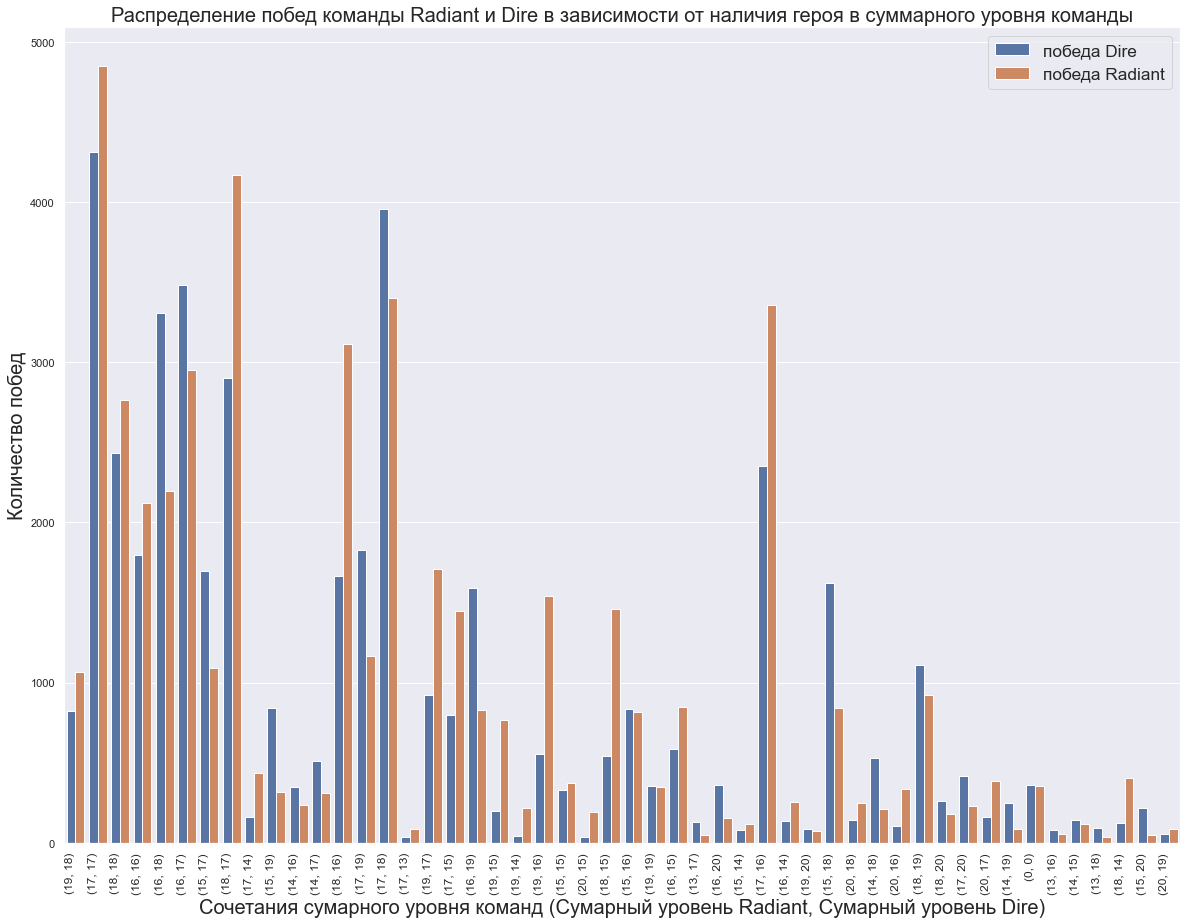

In [108]:
plt.figure(figsize=(20,15)) 
sns.countplot(x='levels', hue='radiant_win', data=top_50)
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Сочетания сумарного уровня команд (Сумарный уровень Radiant, Cумарный уровень Dire)',  
           fontsize=20)
plt.title('Распределение побед команды Radiant и Dire в зависимости от наличия героя в суммарного уровня команды', 
          fontsize=20)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=12  
);
plt.legend(['победа Dire', 'победа Radiant'], fontsize='xx-large');

Как можно заметить на графике, чем больше сумарный уровень команды по сравнению с другой, тем больше вероятность того, что это команда выиграет. Данную характеристику необходимо добавить в выборки

In [109]:
all_data['r_sum_level'] = all_data.iloc[:, range(3,36,8)].sum(axis=1)
all_data['d_sum_level'] = all_data.iloc[:, range(43,76,8)].sum(axis=1)

## rN_xp и dN_xp

Данный признак отображает максимальный достигнутый опыт того или иного героя матча (за первые 5 игровых минут)

Посмотрим какие значения может принимать данный признак и как он распределен

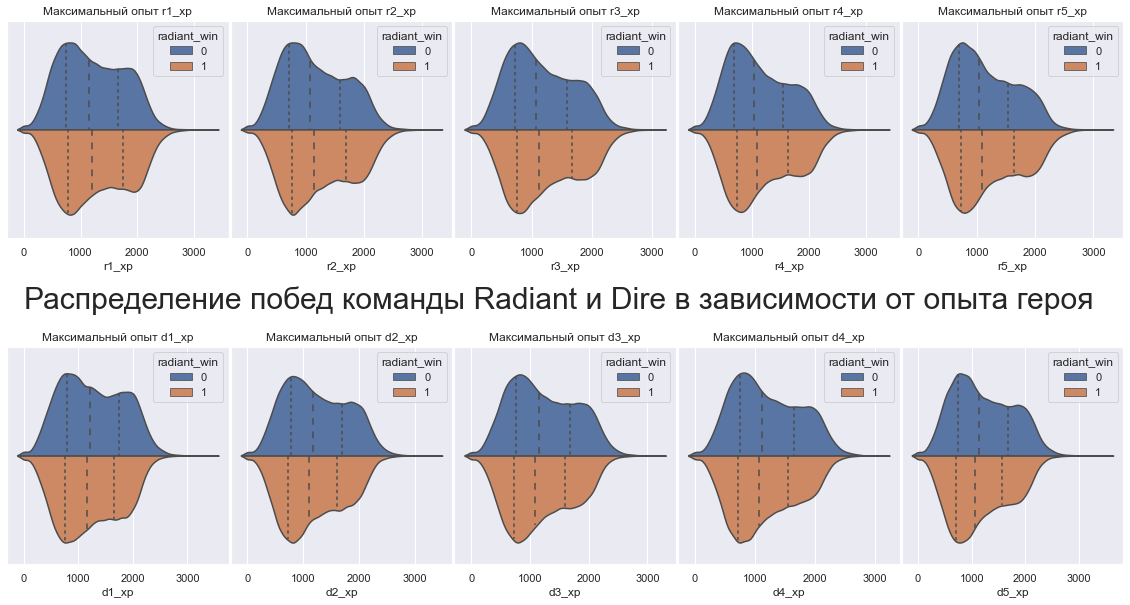

In [110]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.01)
for idx, col_name in zip([(i, j) for j in range(2) for i in range(5)],
                         train.columns[range(4,77,8)]):
    sns.violinplot(data=train_with_ans, x=col_name, y=['']*len(train_with_ans),
                   bw=0.1,
                   hue='radiant_win', ax=axs[idx[1], idx[0]], 
                   split=True, inner='quartile')
    axs[idx[1], idx[0]].set_title('Максимальный опыт {0}'.format(col_name))
plt.title('Распределение побед команды Radiant и Dire в зависимости от опыта героя', 
          fontsize=30, y=1.15, x=-1.55);

Чаще всего герой достигает опыта чуть меньше 1000, что согласно [данной странице](https://dota2-ru.gamepedia.com/%D0%9E%D0%BF%D1%8B%D1%82) соответсвует 3 уровню героя

Как влияет общая сумма опыта героев команды на исход матча?

In [111]:
# суммирование опыта команды Radiant
radiant_xp = train.iloc[:, range(4,37,8)].sum(axis=1)
# суммирование опыта команды Dire
dire_xp = train.iloc[:, range(44,77,8)].sum(axis=1)

# разница суммарного опыта между Radiant и Dire
xp_difference = radiant_xp - dire_xp

# DF с ответами на основе этих данных
df_xp = pd.DataFrame(data={
    'xp_difference': xp_difference,
    'radiant_win': train_with_ans.radiant_win})

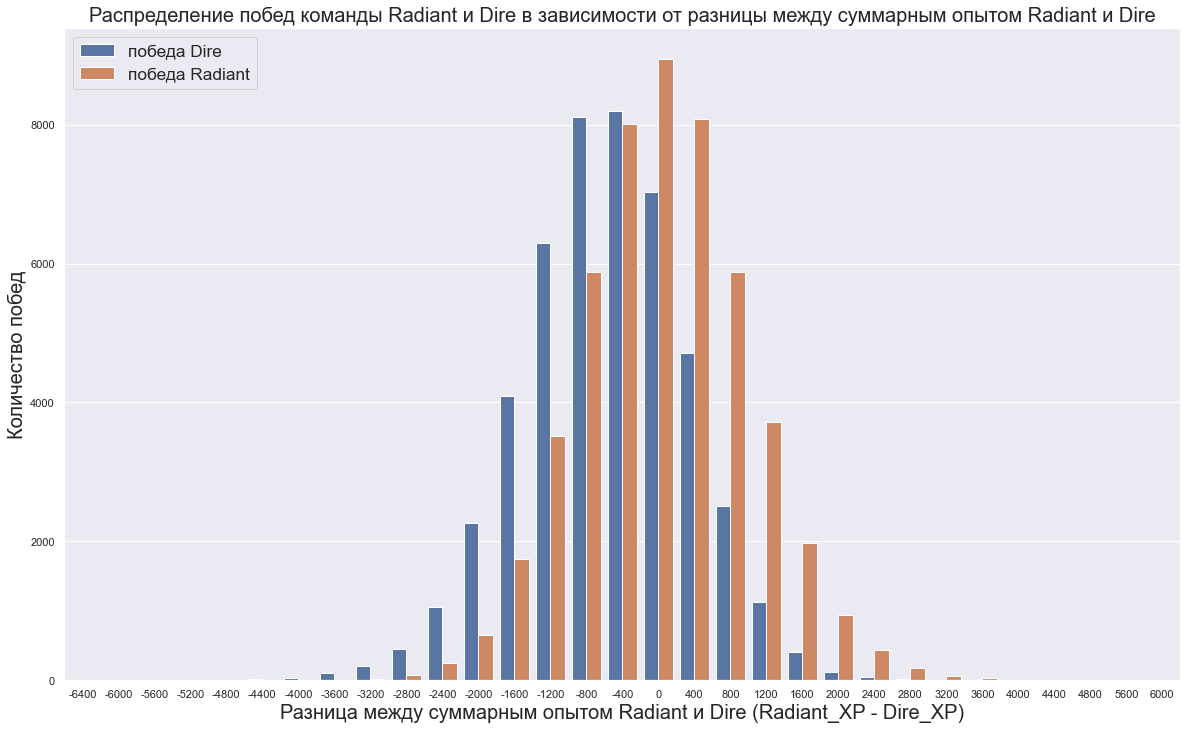

In [113]:
plt.figure(figsize=(20, 12))
sns.countplot(x=df_xp['xp_difference']//400*400, hue=df_xp['radiant_win'])
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Разница между суммарным опытом Radiant и Dire (Radiant_XP - Dire_XP)', 
           fontsize=20)
plt.title('Распределение побед команды Radiant и Dire в зависимости от разницы между суммарным опытом Radiant и Dire', 
          fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'], 
           fontsize='xx-large', loc='upper left');

На графике очень хорошо видно, что чем больше разница в опыте между командами, тем выше вероятность победы одной из них. Данную характеристику также необходимо добывить в выборки.

In [114]:
all_data['r_sum_xp'] = all_data.iloc[:, range(4,37,8)].sum(axis=1)
all_data['d_sum_xp'] = all_data.iloc[:, range(44,77,8)].sum(axis=1)

## rN_gold и dN_gold

Данный признак отображает последнее значение общего количества золота того или иного героя матча. Основная цель золота в покупке предметов. Игрок с наибольшим количеством золота сможет купить более сильные предметы, и тем самым иметь очень сильного героя. Предметы которые покупает каждый игрок зависят от роли в команде и от многих других факторов.

Посмотрим какие значения может принимать данный признак и как он распределен

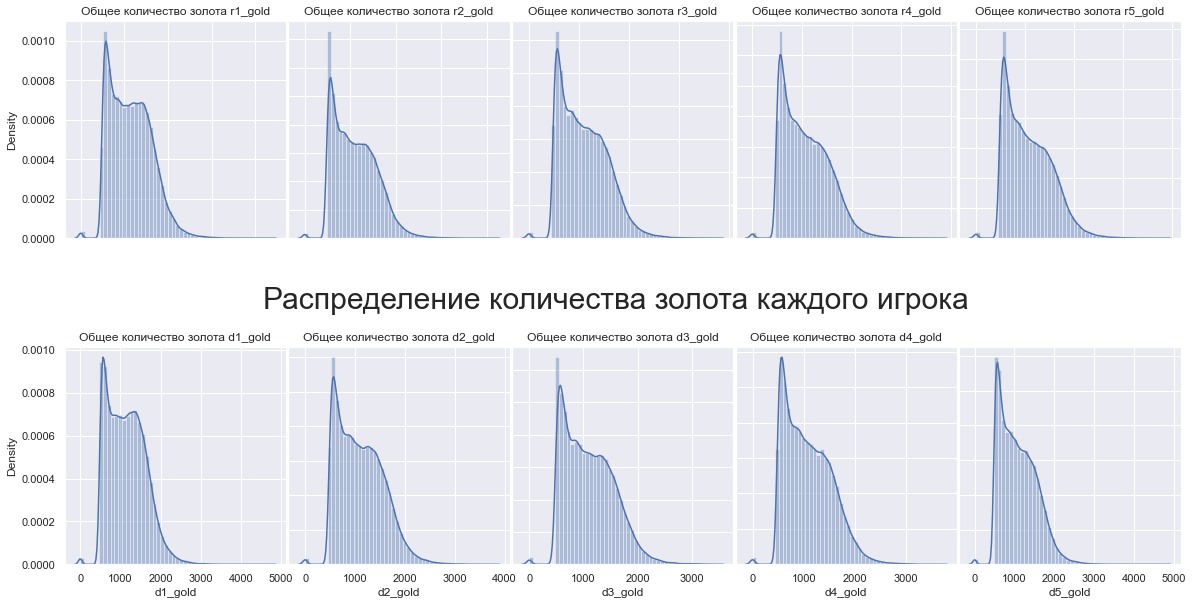

In [115]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.01)
for idx, col_name in zip([(i, j) for j in range(2) for i in range(5)], 
                         train.columns[range(5,78,8)]):
    sns.distplot(train[col_name], ax=axs[idx[1], idx[0]])
    axs[idx[1], idx[0]].set_title('Общее количество золота {0}'.format(col_name))
plt.title('Распределение количества золота каждого игрока', 
          fontsize=30, y=1.15, x=-1.55);
for ax in axs.flat:
    ax.label_outer()

Как влияет общая сумма золота героев команды на исход матча?

In [116]:
# суммирование золота команды Radiant
radiant_gold = train.iloc[:, range(5,38,8)].sum(axis=1)
# суммирование золота команды Dire
dire_gold = train.iloc[:, range(45,78,8)].sum(axis=1)

# разница суммарного золота между Radiant и Dire
gold_difference = radiant_gold - dire_gold

# DF с ответами на основе этих данных
df_gold = pd.DataFrame(data={
    'gold_difference': gold_difference,
    'radiant_win': train_with_ans.radiant_win})


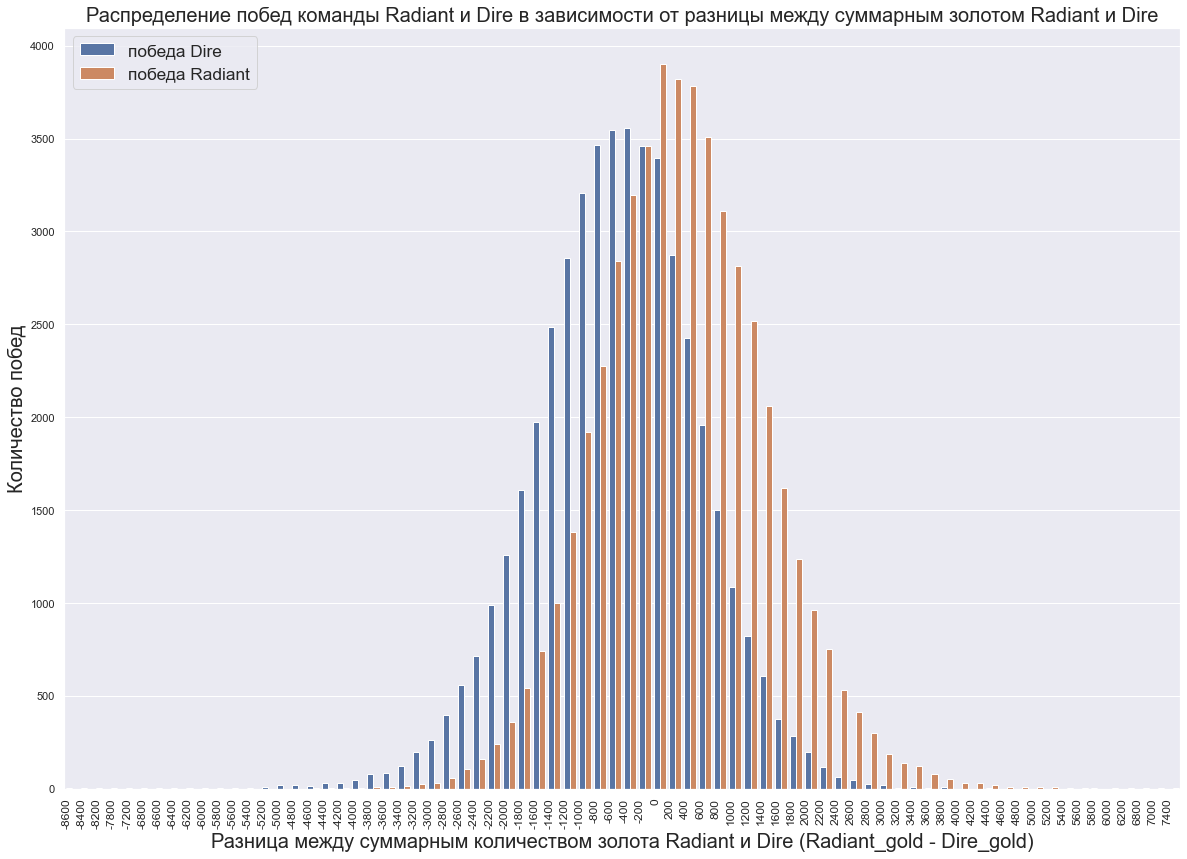

In [117]:
plt.figure(figsize=(20, 14))
sns.countplot(x=df_gold['gold_difference']//200*200, hue=df_gold['radiant_win'])
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Разница между суммарным количеством золота Radiant и Dire (Radiant_gold - Dire_gold)', 
           fontsize=20)
plt.title('Распределение побед команды Radiant и Dire в зависимости от разницы между суммарным золотом Radiant и Dire', 
          fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'], fontsize='xx-large', loc='upper left')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=12 
);

Картина такая же как и на прошлом шаге. Добавим данную характеристику в выборки

In [118]:
all_data['r_sum_gold'] = all_data.iloc[:, range(5,38,8)].sum(axis=1)
all_data['d_sum_gold'] = all_data.iloc[:, range(45,78,8)].sum(axis=1)

## rN_lh и dN_lh

Данный признак отображает число убитых юнитов

Посмотрим какие значения может принимать данный признак и как он распределен

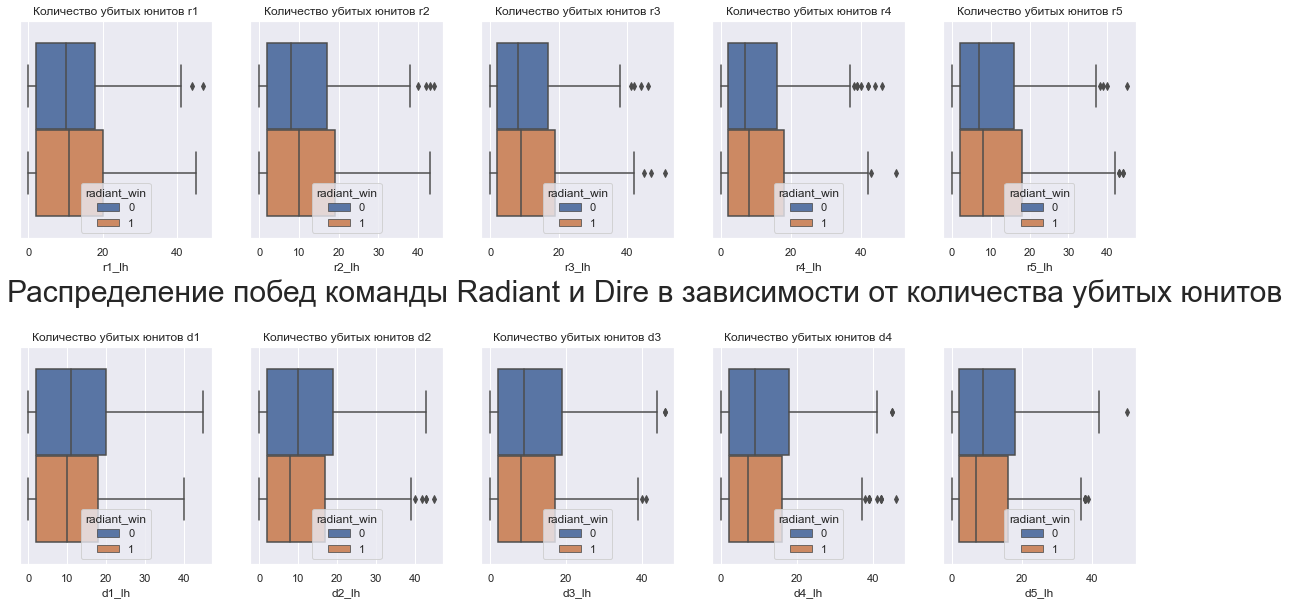

In [119]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
for idx, col_name in zip([(i, j) for j in range(2) for i in range(5)],
                         train.columns[range(6,79,8)]):
    axs[idx[1], idx[0]].set_title('Количество убитых юнитов {0}'.format(col_name.split('_')[0]))
    sns.boxplot(data=train_with_ans, x=col_name, y=['']*len(train_with_ans),
                hue='radiant_win', ax=axs[idx[1], idx[0]])
plt.title('Распределение побед команды Radiant и Dire в зависимости от количества убитых юнитов', 
          fontsize=30, y=1.18, x=-1.55);

Как влияет общая убитых юнитов команды на исход матча?

In [120]:
# суммирование числа убитых юнитов команды Radiant
radiant_lh = train.iloc[:, range(6,39,8)].sum(axis=1)
# суммирование числа убитых юнитов команды Dire
dire_lh = train.iloc[:, range(46,79,8)].sum(axis=1)

# разница суммарного числа убитых юнитов между Radiant и Dire
lh_difference = radiant_lh - dire_lh

# DF с ответами на основе этих данных
df_lh = pd.DataFrame(data={
    'lh_difference': lh_difference,
    'radiant_win': train_with_ans.radiant_win})

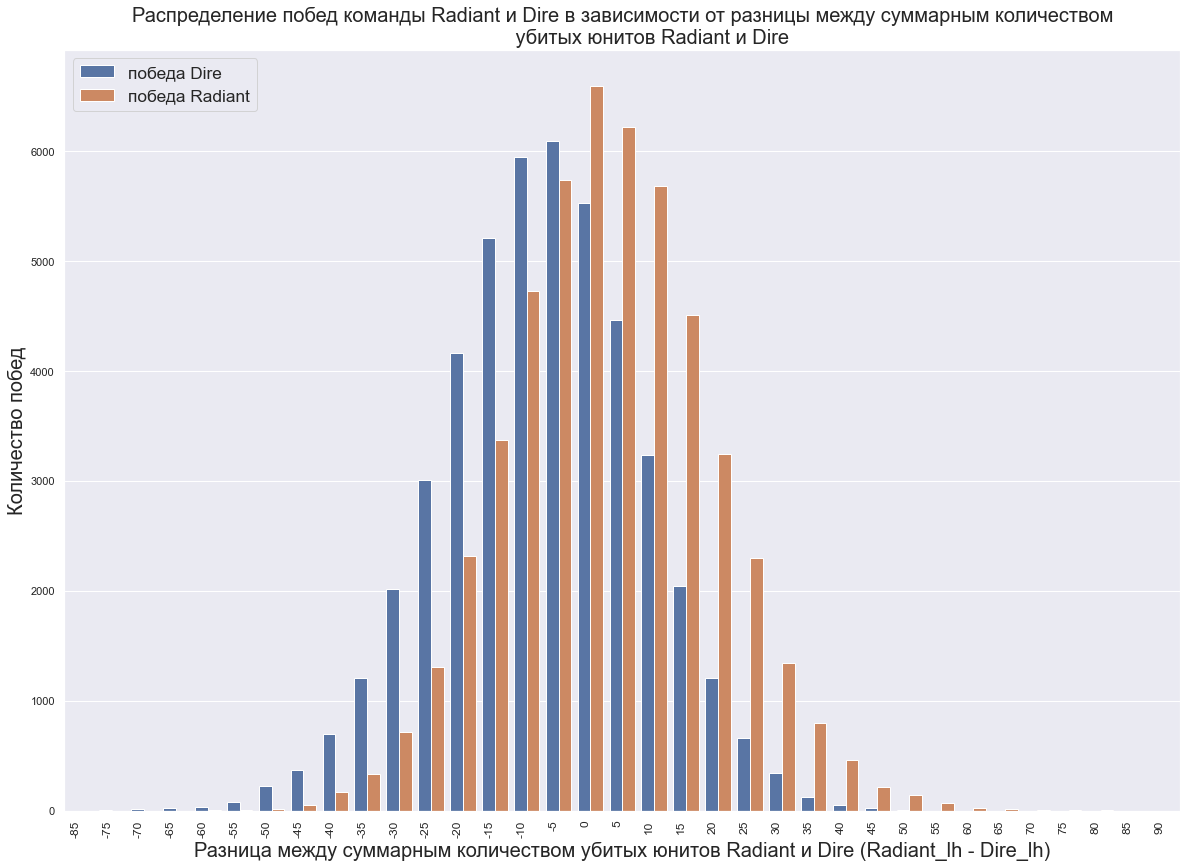

In [121]:
plt.figure(figsize=(20, 14))
sns.countplot(x=df_lh['lh_difference']//5*5, hue=df_lh['radiant_win'])
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Разница между суммарным количеством убитых юнитов Radiant и Dire (Radiant_lh - Dire_lh)',
           fontsize=20)
plt.title('''Распределение побед команды Radiant и Dire в зависимости от разницы между суммарным количеством
           убитых юнитов Radiant и Dire''', fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'], 
           fontsize='xx-large', loc='upper left')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=12 
);

Картина такая же как и на прошлом шаге. Добавим данную характеристику в выборки

In [122]:
all_data['r_sum_lh'] = all_data.iloc[:, range(6,39,8)].sum(axis=1)
all_data['d_sum_lh'] = all_data.iloc[:, range(46,79,8)].sum(axis=1)

## rN_kills и dN_kills

Данный признак отображает число убитых игроков.

Посмотрим какие значения может принимать данный признак и как он распределен

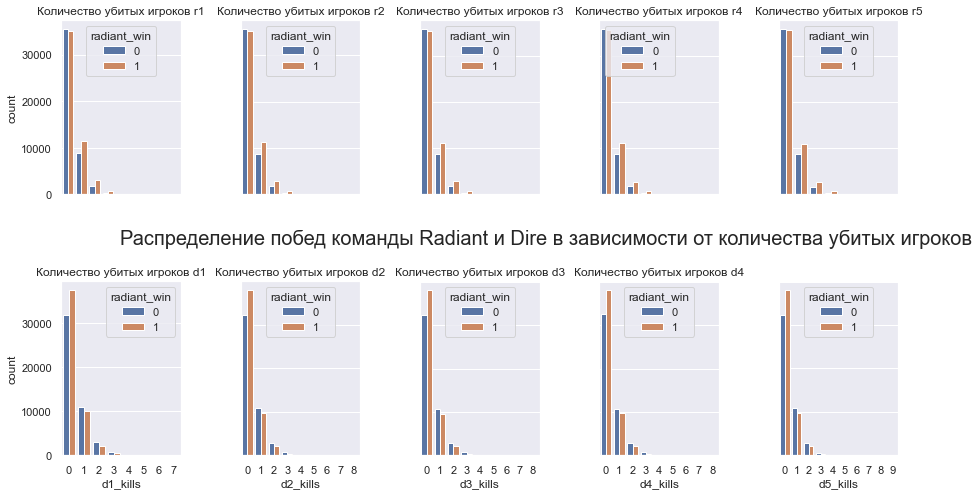

In [123]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for idx, col_name in zip([(i, j) for j in range(2) for i in range(5)],
                         train.columns[range(7,80,8)]):
    axs[idx[1], idx[0]].set_title('Количество убитых игроков {0}'.format(col_name.split('_')[0]))
    sns.countplot(x=train_with_ans[col_name], hue=train_with_ans['radiant_win'], 
                  ax=axs[idx[1], idx[0]])
plt.title('Распределение побед команды Radiant и Dire в зависимости от количества убитых игроков', 
          fontsize=20, y=1.18, x=-1.95);
for ax in axs.flat:
    ax.label_outer()

Чаще всего за первые 5 минут матча игроки не успевают убить 1 игрока вражеской команды или успевают убить одного.

Как влияет сумма общая убитых игроков команды на исход матча?

In [124]:
# суммирование убитых игроков команды Radiant
radiant_kill = train.iloc[:, range(7,40,8)].sum(axis=1)
# суммирование убитых игроков команды Dire
dire_kill = train.iloc[:, range(47,80,8)].sum(axis=1)

# разница суммарного убитых игроков между Radiant и Dire
kill_difference = radiant_kill - dire_kill

# DF с ответами на основе этих данных
df_kill = pd.DataFrame(data={
    'kill_difference': kill_difference,
    'radiant_win': train_with_ans.radiant_win})

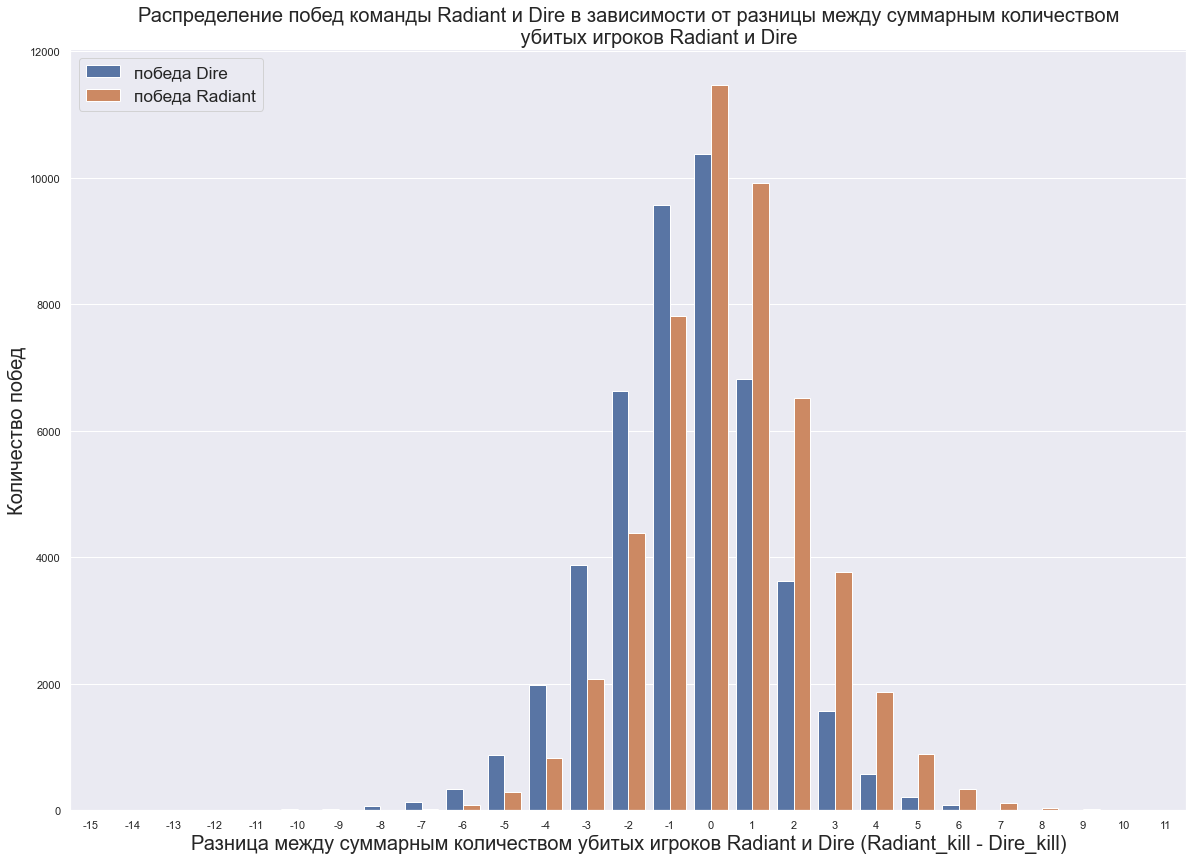

In [125]:
plt.figure(figsize=(20, 14))
sns.countplot(x=df_kill['kill_difference'], hue=df_kill['radiant_win'])
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Разница между суммарным количеством убитых игроков Radiant и Dire (Radiant_kill - Dire_kill)',  
           fontsize=20)
plt.title('''Распределение побед команды Radiant и Dire в зависимости от разницы между суммарным количеством
           убитых игроков Radiant и Dire''', fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'],
           fontsize='xx-large', loc='upper left');

Картина такая же как и на прошлом шаге. Добавим данную характеристику в выборки


In [126]:
all_data['r_sum_kill'] = all_data.iloc[:, range(7,40,8)].sum(axis=1)
all_data['d_sum_kill'] = all_data.iloc[:, range(47,80,8)].sum(axis=1)

## rN_deaths и dN_deaths

Данный признак отображает число смертей героя.

Посмотрим какие значения может принимать данный признак и как он распределен

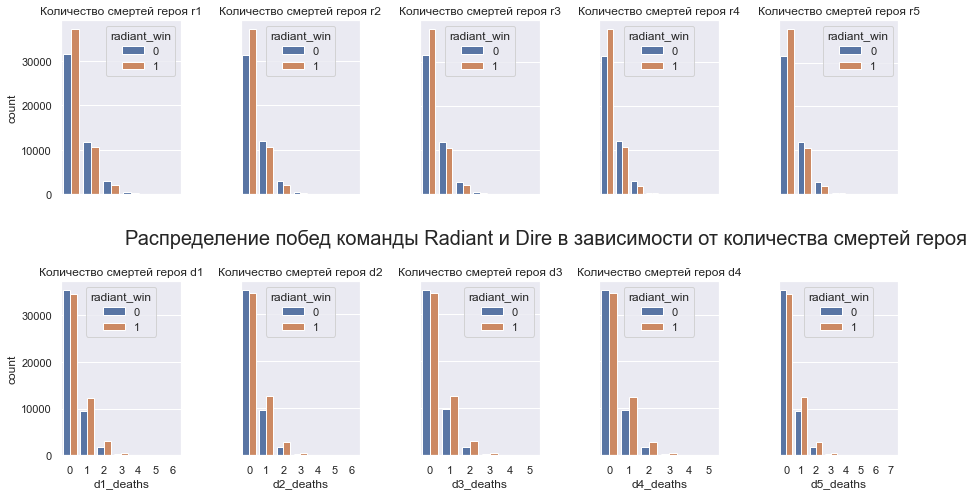

In [127]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for idx, col_name in zip([(i, j) for j in range(2) for i in range(5)], 
                         train.columns[range(8,81,8)]):
    axs[idx[1], idx[0]].set_title('Количество смертей героя {0}'.format(col_name.split('_')[0]))
    sns.countplot(x=train_with_ans[col_name], hue=train_with_ans['radiant_win'],
                  ax=axs[idx[1], idx[0]])
plt.title('Распределение побед команды Radiant и Dire в зависимости от количества смертей героя', 
          fontsize=20, y=1.18, x=-1.95);
for ax in axs.flat:
    ax.label_outer()

Чаще всего за первые 5 минут матча герои не умерают или к умирают один раз

Как влияет общая сумма числа смертей героев команды на исход матча?

In [128]:
# суммирование количества смертей игроков команды Radiant
radiant_death = train.iloc[:, range(8,41,8)].sum(axis=1)
# суммирование количества смертей игроков команды Dire
dire_death = train.iloc[:, range(48,81,8)].sum(axis=1)

# разница между суммарным количеством смертей игроков Radiant и Dire
death_difference = radiant_death - dire_death

# DF с ответами на основе этих данных
df_death = pd.DataFrame(data={
    'death_difference': death_difference,
    'radiant_win': train_with_ans.radiant_win})

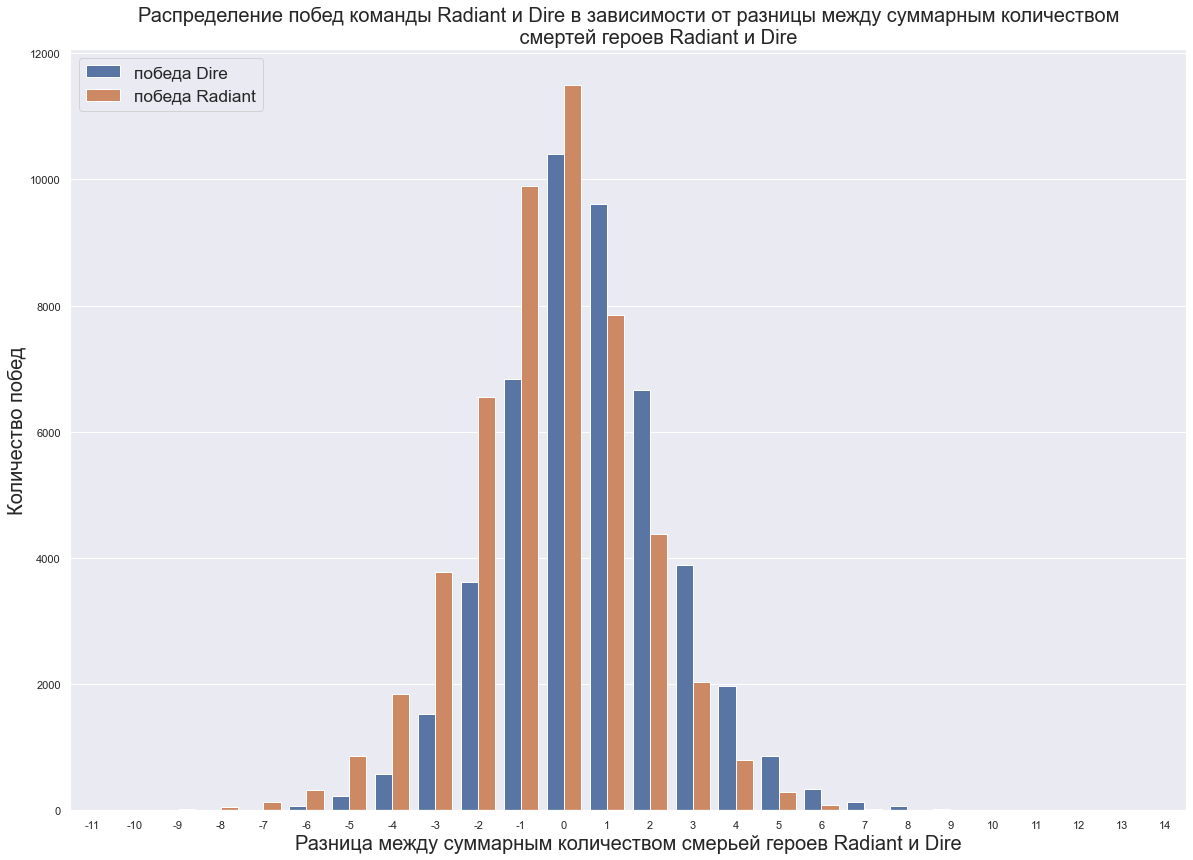

In [130]:
plt.figure(figsize=(20, 14))
sns.countplot(x=df_death['death_difference'], hue=df_death['radiant_win'])
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Разница между суммарным количеством смерьей героев Radiant и Dire',  
           fontsize=20)
plt.title('''Распределение побед команды Radiant и Dire в зависимости от разницы между суммарным количеством
           смертей героев Radiant и Dire''', fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'],
           fontsize='xx-large', loc='upper left');

Данный график показывает, что не всегда большее количество суммарных смертей героев в одной команде означает, что победит противоположная команда. Так, например, для `(Radiant_deaths - dire_deaths) = 1, 2` график показывает, что выигрыш за командой `Dire` в больших случаях. Несмотря на неочевидность распределения выигрыша между командами в зависимости от данной характеристики, я все-таки добавлю данную характеристику в выборки

In [131]:
all_data['r_sum_death'] = all_data.iloc[:, range(8,41,8)].sum(axis=1)
all_data['d_sum_death'] = all_data.iloc[:, range(48,81,8)].sum(axis=1)

## rN_items и dN_items

Данный признак показывает число предметов, купленных тем или иным героем.

Посмотрим какие значения может принимать данный признак и как он распределен

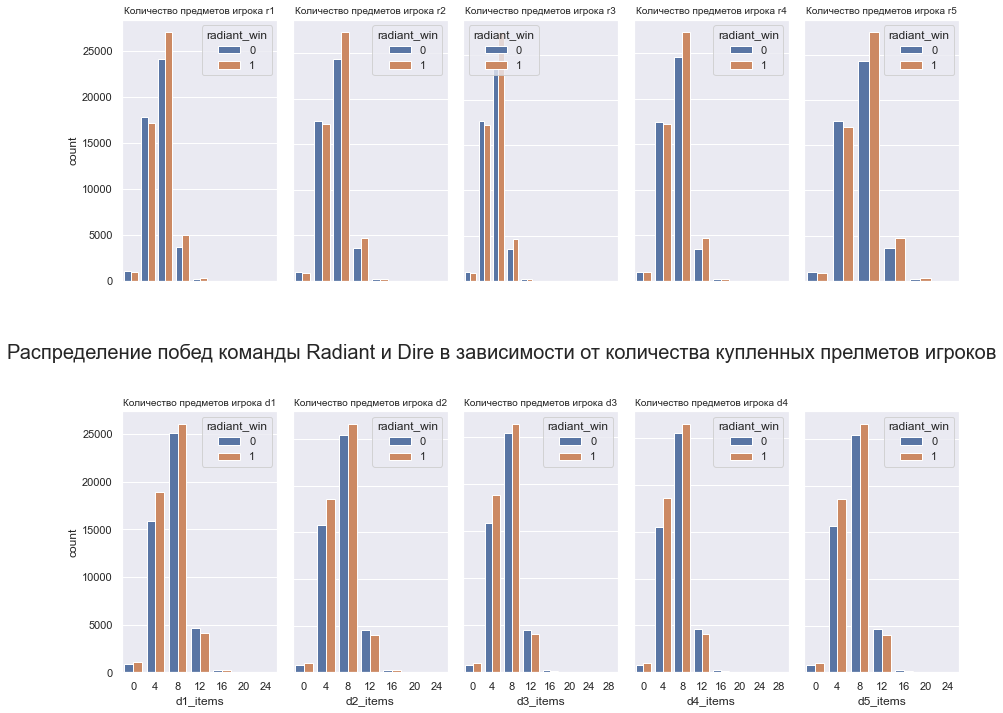

In [132]:
fig, axs = plt.subplots(2, 5, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.1)
for idx, col_name in zip([(i, j) for j in range(2) for i in range(5)],
                         train.columns[range(9,82,8)]):
    axs[idx[1], idx[0]].set_title('Количество предметов игрока {0}'.format(col_name.split('_')[0]),
                                  fontsize=10)
    sns.countplot(x=train_with_ans[col_name]//4*4, 
                  hue=train_with_ans['radiant_win'], ax=axs[idx[1], idx[0]])
plt.title('Распределение побед команды Radiant и Dire в зависимости от количества купленных прелметов игроков',
          fontsize=20, y=1.18, x=-1.95);
for ax in axs.flat:
    ax.label_outer()

Чаще всего игроки успевают приобрести около `8` предметов за первые 5 минут матча

In [133]:
# суммирование числа купленных предметов игроков Radiant
radiant_items = train.iloc[:, range(8,41,8)].sum(axis=1)
# суммирование числа купленных предметов игроков Dire
dire_items = train.iloc[:, range(48,81,8)].sum(axis=1)

# разница суммарного числа купленных предметов между Radiant и Dire
items_difference = radiant_items - dire_items

# DF с ответами на основе этих данных
df_items = pd.DataFrame(data={
    'items_difference': items_difference,
    'radiant_win': train_with_ans.radiant_win})

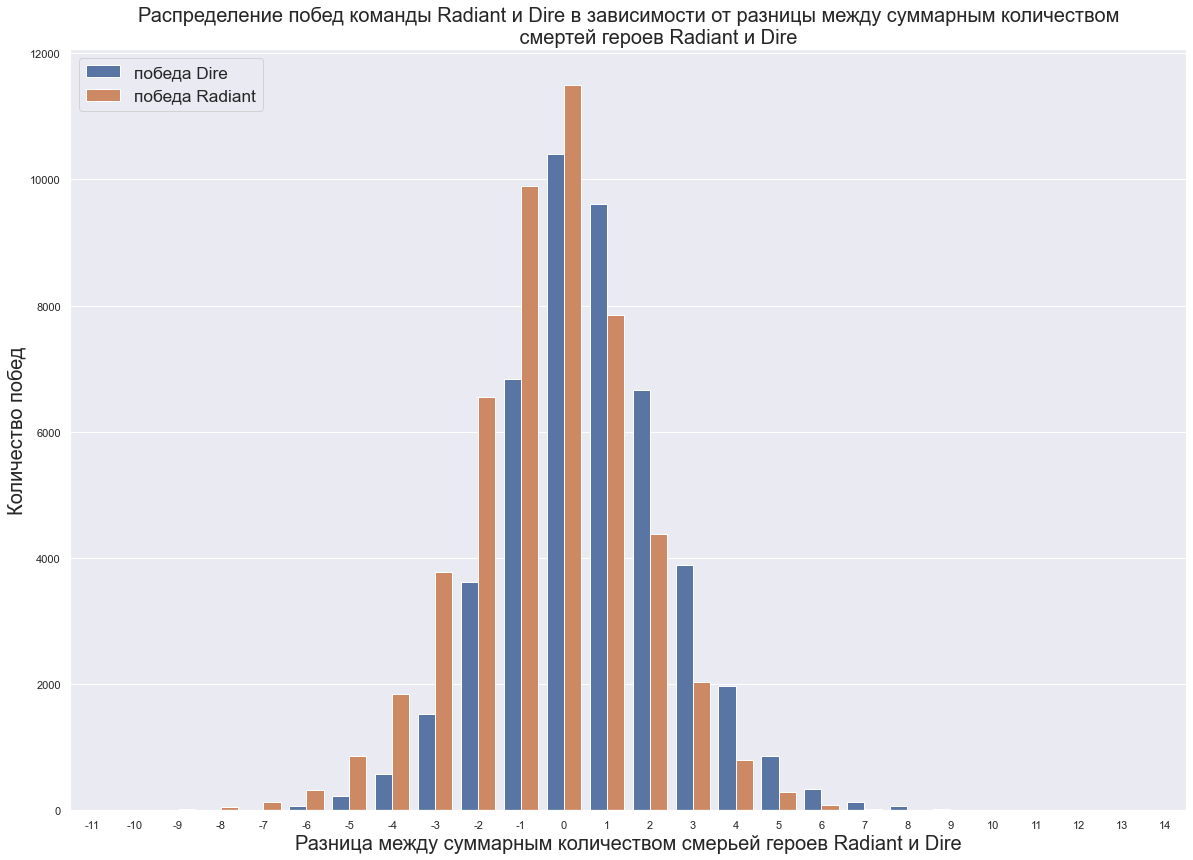

In [135]:
plt.figure(figsize=(20, 14))
sns.countplot(x=df_items['items_difference'],
              hue=df_items['radiant_win'])
plt.ylabel('Количество побед',  fontsize=20)
plt.xlabel('Разница между суммарным количеством смерьей героев Radiant и Dire',  
           fontsize=20)
plt.title('''Распределение побед команды Radiant и Dire в зависимости от разницы между суммарным количеством
           смертей героев Radiant и Dire''', fontsize=20)
plt.legend(['победа Dire', 'победа Radiant'], 
           fontsize='xx-large', loc='upper left');

Для признака `items` ситуация такая же, как и для признака `death`, а именн общее количество предметов в одной команде по сравнению с другой не 'говорит' о том, какая из них выиграет. Я не буду добавлять даннух характеристику, потому что нет информации о том, какой именно предмет был преобретен.

#  Построение модели

## Подход 1: градиентный бустинг

In [136]:
# подключение необходимых модулей
from datetime import datetime

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm

In [137]:
# выбор определенных признаков для обучения на основе GradientBoostingClassifier
col_for_gb = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
              'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero',
              'dire_courier_time', 'radiant_courier_time',
              'dire_flying_courier_time', 'radiant_flying_courier_time', 
              'dire_first_ward_time', 'radiant_first_ward_time', 
              'dire_bottle_time', 'radiant_bottle_time',
              'r_kill_not_hero', 'd_kill_not_hero', 'r_kill_hero',
              'd_kill_hero', 'dire_ward_sum', 'radiant_ward_sum',
              'radiant_tps_boots_sum', 'dire_tps_boots_sum',
              'r_sum_xp', 'd_sum_xp', 'r_sum_gold', 'd_sum_gold', 
              'r_sum_lh', 'd_sum_lh', 'r_sum_kill', 'd_sum_kill']

# формирование обучающей выборки для GradientBoostingClassifier
X_train_gb = all_data.loc[train.index, col_for_gb]

Размерность обучающей выборки получилось много меньше, чем исходная, при этом, я считаю, что необходимые признаки сохранены

In [138]:
X_train_gb.shape

(97230, 34)

In [139]:
# генератор разбиений для кросс-волидации по 5 блоков
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [140]:
scores = {'n_estimators': [], 'time': [], 'score': []}

for n_e in tqdm(range(10, 201, 10)):
    gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=n_e)
    start_time = datetime.now()
    cvs = cross_val_score(gb_clf, X_train_gb, y_train, error_score='roc_auc', 
                          cv=kf, n_jobs=-1)
    end_time = datetime.now()
    scores['n_estimators'].append(n_e)
    scores['time'].append(end_time - start_time)
    scores['score'].append(np.around(cvs.mean(), 4))
    for k, v in scores.items():
        print(k, ' : ', v[-1])

n_estimators  :  10
time  :  0:00:10.660134
score  :  0.6495
n_estimators  :  20
time  :  0:00:16.164467
score  :  0.6516
n_estimators  :  30
time  :  0:00:24.652056
score  :  0.6522
n_estimators  :  40
time  :  0:00:32.227921
score  :  0.6527
n_estimators  :  50
time  :  0:00:39.126106
score  :  0.6539
n_estimators  :  60
time  :  0:00:48.234267
score  :  0.6543
n_estimators  :  70
time  :  0:00:55.844991
score  :  0.6553
n_estimators  :  80
time  :  0:01:04.863362
score  :  0.6561
n_estimators  :  90
time  :  0:01:15.801243
score  :  0.6564
n_estimators  :  100
time  :  0:01:37.174813
score  :  0.6569
n_estimators  :  110
time  :  0:01:36.840699
score  :  0.6571
n_estimators  :  120
time  :  0:01:50.885812
score  :  0.6576
n_estimators  :  130
time  :  0:02:05.944299
score  :  0.6579
n_estimators  :  140
time  :  0:02:02.638866
score  :  0.6581
n_estimators  :  150
time  :  0:02:06.547415
score  :  0.6584
n_estimators  :  160
time  :  0:02:05.042370
score  :  0.6589
n_estimators  :  

In [141]:
# Преобразование словаря в DataFrame
scores = pd.DataFrame(scores)
scores['seconds'] = scores.time.apply(lambda x: x.seconds)

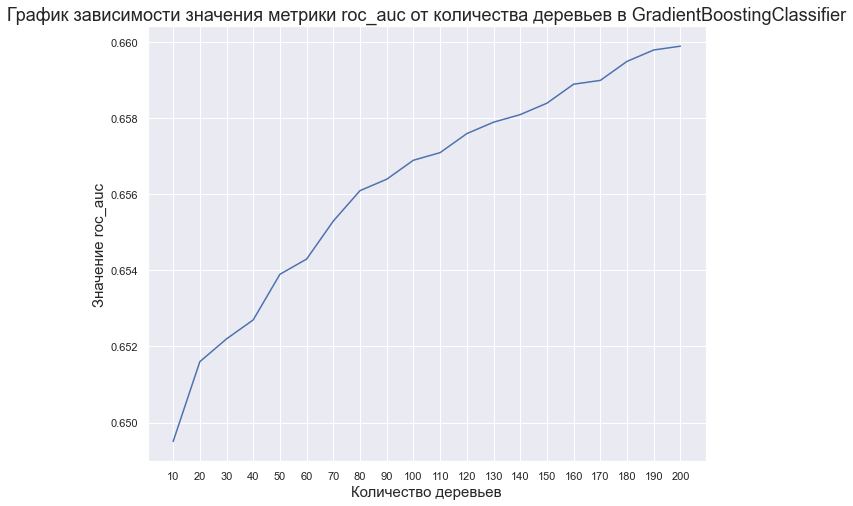

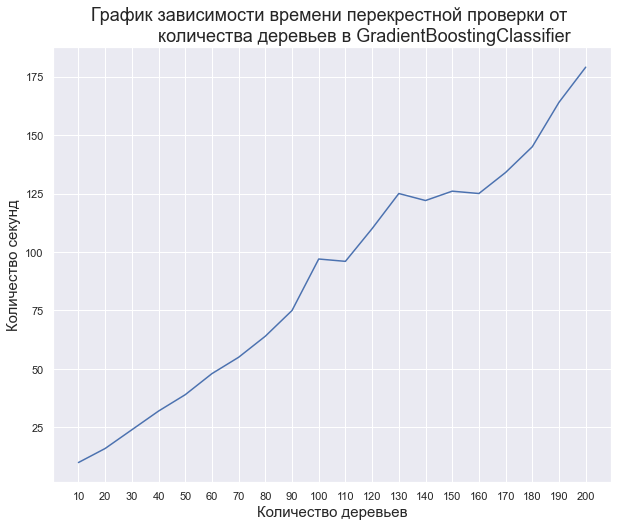

In [142]:
plt.figure(figsize=(10, 8))
plt.title('График зависимости значения метрики roc_auc от количества деревьев в GradientBoostingClassifier', 
          fontsize=18)
sns.lineplot(x='n_estimators', y='score', data=scores)
plt.ylabel('Значение roc_auc', fontsize=15)
plt.xlabel('Количество деревьев', fontsize=15)
plt.xticks(range(10, 201, 10));
plt.figure(figsize=(10, 8))
plt.title("""График зависимости времени перекрестной проверки от 
             количества деревьев в GradientBoostingClassifier""", 
          fontsize=18)
sns.lineplot(x='n_estimators', y='seconds', data=scores)
plt.ylabel('Количество секунд', fontsize=15)
plt.xlabel('Количество деревьев', fontsize=15)
plt.xticks(range(10, 201, 10));

Каждые `10` деревьев увеличивают время выполнения перекресной проверки примерно на `10` секунд. Причем при количестве деревьев = `80` качество метрики на перекрестной проверке увеличивается медленнее при добавлении новых деревьев. Скорее всего качество будет улучшаться при увеличении количества деревьев, однако достаточно медленно. К тому же время выполнения будет все также линейно расти. Для увеличения скорости построения моделей можно брать для обучения случайное подмножество множества объектов обучающей выборки.

Параметр `n_estimators` не единственный, который можно изменять. Проверим, как изменение других параметров изменит значение метрики на перекрестной проверке.

In [143]:
# создание экземпляра GradientBoostingClassifier с фиксированным значением n_estimators
gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=150, 
                                    max_features='sqrt')

param_grid = {'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
              'max_depth': [3, 4, 5, 6, 7, 8]}

grid_gb = GridSearchCV(gb_clf, param_grid=param_grid, cv=kf, scoring='roc_auc')
grid_gb.fit(X_train_gb, y_train)
best_gb = grid_gb.best_estimator_
print("Best cross-validation score: {:.4f}".format(grid_gb.best_score_))
print("Best parameters: {}".format(grid_gb.best_params_))

Best cross-validation score: 0.7207
Best parameters: {'learning_rate': 0.1, 'max_depth': 6}


За счет изменения параметров получилось достичь значения `0.7207`

## Подход 2: логистическая регрессия

In [144]:
# подключение необходимых частей модуля

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Для логистической регрессии обучающая выборка будет сформированно немного иначе, т.к. данная модель хорошо справляется с большой размерностью данных. Я сразу исключил такие категориальные признаки как `[r|d]N_hero` и `lobby_type` потому что данные характеристики не влияют на обобщающую способность, т.к. они категориальные и не закодированные

In [145]:
col_to_drop = [team + str(num) + '_' + feature 
               for team in ['r', 'd']
               for num in range(1, 6)
               for feature in ['hero']]

X_train_lr = X_train_gb.drop(columns=col_to_drop, axis='column')

Посмотрим на степень корреляции между переменными

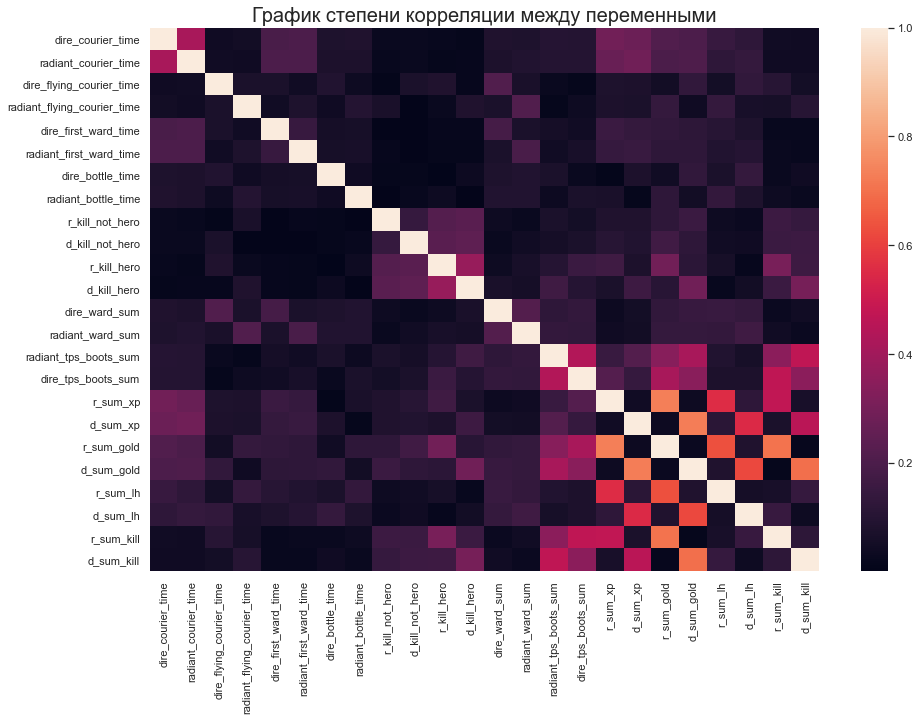

In [146]:
plt.figure(figsize=(15,10))
plt.title('График степени корреляции между переменными', fontsize=20)
sns.heatmap(abs(X_train_lr.corr()));

Некорые признаки сильно коррелируют между собой, но я считаю, что это не критично и оставлю их


Преобразуем данные для корректной работы логистической регрессии

In [147]:
X_train_lr_sc = StandardScaler().fit_transform(X_train_lr)

In [148]:
scores_lr = {'C': [], 'time': [], 'score': []}

С_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for c in tqdm(С_values):
    lr_clf = LogisticRegression(random_state=0, C=c, penalty='l2')
    start_time = datetime.now()
    cvs = cross_val_score(lr_clf, X_train_lr_sc, y_train, error_score='roc_auc', cv=kf)
    end_time = datetime.now()
    scores_lr['C'].append(c)
    scores_lr['time'].append(end_time - start_time)
    scores_lr['score'].append(np.around(cvs.mean(), 4))
    for k, v in scores_lr.items():
        print(k, ' : ', v[-1])
    print('______________________')

C  :  0.001
time  :  0:00:00.721369
score  :  0.6525
______________________
C  :  0.005
time  :  0:00:00.966492
score  :  0.6528
______________________
C  :  0.01
time  :  0:00:00.778523
score  :  0.6529
______________________
C  :  0.05
time  :  0:00:00.785717
score  :  0.653
______________________
C  :  0.1
time  :  0:00:00.796550
score  :  0.653
______________________
C  :  0.5
time  :  0:00:00.809797
score  :  0.6531
______________________
C  :  1
time  :  0:00:00.806903
score  :  0.6531
______________________
C  :  5
time  :  0:00:00.805679
score  :  0.6531
______________________
C  :  10
time  :  0:00:00.808981
score  :  0.6531
______________________
C  :  50
time  :  0:00:00.813412
score  :  0.6531
______________________
C  :  100
time  :  0:00:00.804818
score  :  0.6531
______________________



Качество модели получилось такое же, как и у `GradientBoostingClassifier`, однако логистическая регрессия строится намного быстрее

In [166]:
# Преобразование словаря в DataFrame
scores_lr = pd.DataFrame(scores_lr)
scores_lr['microseconds'] = scores_lr.time.apply(lambda x: x.microseconds // 10000)
scores_lr['log(C)'] = np.log(scores_lr.C)

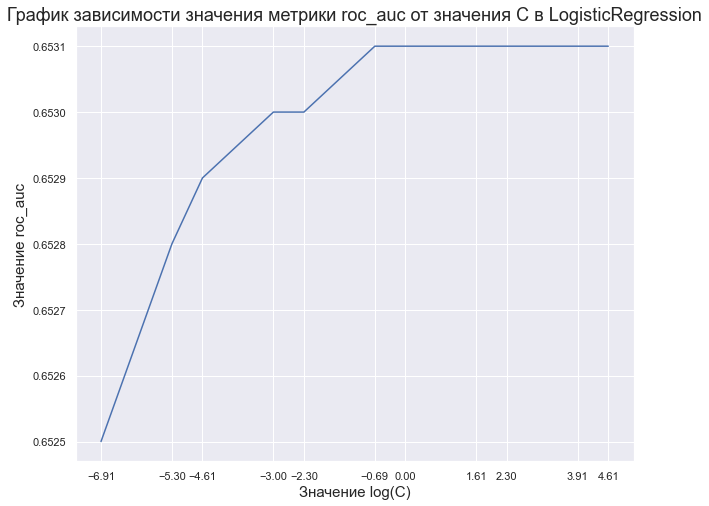

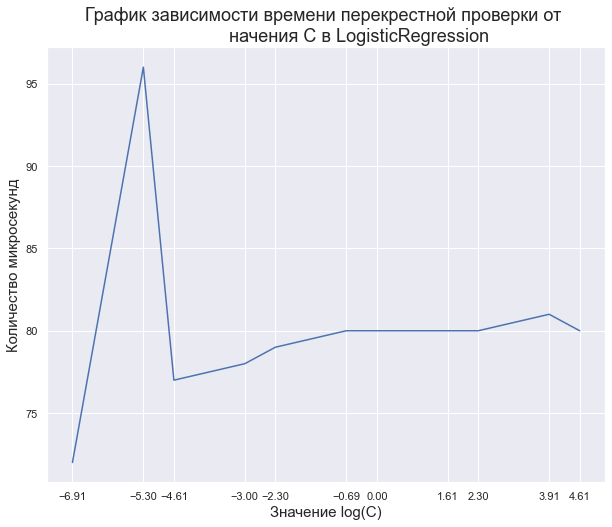

In [168]:
plt.figure(figsize=(10,8))
plt.title('График зависимости значения метрики roc_auc от значения С в LogisticRegression',
          fontsize=18)
sns.lineplot(x='log(C)', y='score', data=scores_lr)
plt.ylabel('Значение roc_auc', fontsize=15)
plt.xlabel('Значение log(C)', fontsize=15)
plt.xticks(np.log(С_values))
plt.figure(figsize=(10,8))
plt.title("""График зависимости времени перекрестной проверки от 
             начения С в LogisticRegression""", 
          fontsize=18)
sns.lineplot(x='log(C)', y='microseconds', data=scores_lr)
plt.ylabel('Количество микросекунд', fontsize=15)
plt.xlabel('Значение log(C)', fontsize=15)
plt.xticks(np.log(С_values));

При увеличении параметра регуляризации значение метрики увеличевается, но ненамного. 

Добавим в обучающую выборку __Мешок слов__ из героев, т.к. они играют важную роль в определении победителя.

In [169]:
used_heroes = heroes.loc[[*set_of_used_heroes_id], :]

In [170]:
# создание матрицы размерности (количество примеров в обучающей выборке ; количество возможных героев)
X_pick = np.zeros((train.shape[0], len(heroes)))

# заполнение матрицы X_pick значениями:
#    -1, если i-й герой играл за команду Dire
#     0, если героя никто не выбрал
#     1, если i-й герой играл за команду Radiant
for i, match_id in enumerate(train.index):
    for p in range(5):
        X_pick[i, train.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, train.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [171]:
# создание DataFrame на основе X_pick
X_pick_df = pd.DataFrame(X_pick, columns=heroes.name.values, dtype=int, index=train.index)

In [172]:
# обучающая выборка с мешком слов из героев
X_train_lr_with_heroes = X_train_lr.join(X_pick_df)

Преобразуем данные для корректной работы логистической регрессии

In [173]:
X_train_lr_with_heroes_sc = StandardScaler().fit_transform(X_train_lr_with_heroes)

In [176]:
scores_lr_hero = {'C': [], 'time': [], 'score': []}

С_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for c in tqdm(С_values):
    lr_clf = LogisticRegression(random_state=0, C=c, penalty='l2')
    start_time = datetime.now()
    cvs = cross_val_score(lr_clf, X_train_lr_with_heroes_sc, y_train,
                          error_score='roc_auc', cv=kf)
    end_time = datetime.now()
    scores_lr_hero['C'].append(c)
    scores_lr_hero['time'].append(end_time - start_time)
    scores_lr_hero['score'].append(np.around(cvs.mean(), 4))
    for k, v in scores_lr_hero.items():
        print(k, ' : ', v[-1])
    print('______________________')

C  :  0.001
time  :  0:00:02.429597
score  :  0.6816
______________________
C  :  0.005
time  :  0:00:02.133386
score  :  0.6819
______________________
C  :  0.01
time  :  0:00:02.122872
score  :  0.6816
______________________
C  :  0.05
time  :  0:00:02.178520
score  :  0.6816
______________________
C  :  0.1
time  :  0:00:02.242961
score  :  0.6816
______________________
C  :  0.5
time  :  0:00:02.184665
score  :  0.6816
______________________
C  :  1
time  :  0:00:02.158348
score  :  0.6815
______________________
C  :  5
time  :  0:00:02.158188
score  :  0.6815
______________________
C  :  10
time  :  0:00:02.186506
score  :  0.6815
______________________
C  :  50
time  :  0:00:02.160156
score  :  0.6815
______________________
C  :  100
time  :  0:00:02.157842
score  :  0.6815
______________________



При добавлении __мешка слов__ в обучающий набор значение метрики улучшилось, т.к. герои, которых выбрала та или иная команда, влияют на выигрышь команды. Однако градиентный бустинг показывал лучшие результаты

In [177]:
# Преобразование словаря в DataFrame
scores_lr_hero = pd.DataFrame(scores_lr_hero)
scores_lr_hero['microseconds'] = scores_lr_hero.time.apply(lambda x: x.microseconds // 10000)
scores_lr_hero['log(C)'] = np.log(scores_lr_hero.C)

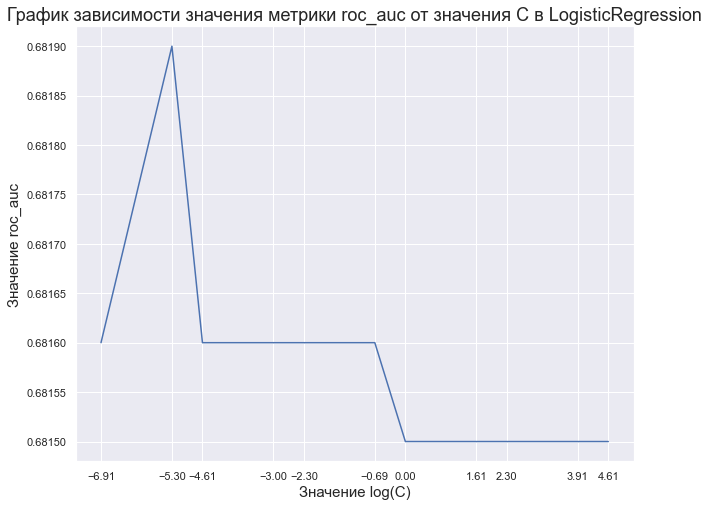

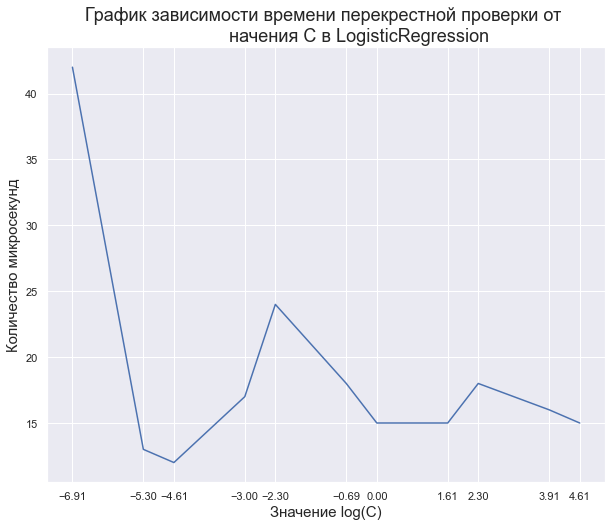

In [178]:
plt.figure(figsize=(10,8))
plt.title('График зависимости значения метрики roc_auc от значения С в LogisticRegression', 
          fontsize=18)
sns.lineplot(x='log(C)', y='score', data=scores_lr_hero)
plt.ylabel('Значение roc_auc', fontsize=15)
plt.xlabel('Значение log(C)', fontsize=15)
plt.xticks(np.log(С_values));
plt.figure(figsize=(10,8))
plt.title("""График зависимости времени перекрестной проверки от 
             начения С в LogisticRegression""", 
          fontsize=18)
sns.lineplot(x='log(C)', y='microseconds', data=scores_lr_hero)
plt.ylabel('Количество микросекунд', fontsize=15)
plt.xlabel('Значение log(C)', fontsize=15)
plt.xticks(np.log(С_values));

В данном случае, при увеличении значения `C` качество немного ухудшается. (в пределах 4 цифры после запятой)

# Вывод

Посмотрим на предсказания лучшей из получившихся по перекрестной проверке моделей

In [179]:
# тестовая выборка для градиентного бустинга
X_test_gb = all_data.loc[test.index, col_for_gb]

In [180]:
# Предсказания лучшей модели
ans = best_gb.predict_proba(X_test_gb)

In [181]:
print('max predict_proba: ', ans.max().round(5),
      '\nmin predict_proba: ', ans.min().round(5))

max predict_proba:  0.97842 
min predict_proba:  0.02158


Значения предсказаний лежат в диапазоне __[0; 1]__

In [188]:
ans_df = pd.DataFrame(data={'match_id':X_test_gb.index, 
                            'radiant_win': ans[:, 1]})

In [189]:
ans_df.to_csv('data/answer.csv', index=False)